<a href="https://colab.research.google.com/github/samswede/Font-Recommender/blob/main/Big_VAE_font_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd # this module is useful to work with tabular data
import random # this module will be used to select random samples from a collection
import os # this module will be used just to create directories in the local filesystem
from tqdm import tqdm # this module is useful to plot progress bars
import plotly.io as pio

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir("/content/dataset")

['A_test', '.ipynb_checkpoints', 'A_train']

In [3]:
#remove problematic .ipynb_checkpoints
#!rm -R /content/dataset/A_train/.ipynb_checkpoints
#!rm -R /content/dataset/A_test/.ipynb_checkpoints
!rm -R /content/drive/MyDrive/Data/Fonts/Aa/.ipynb_checkpoints
#!ls /content/dataset/A_train/ -a   #to make sure that the deletion has occurred
#!ls /content/dataset/A_test/ -a
!ls /content/drive/MyDrive/Data/Fonts/Aa/ -a

anek  baloo  curly  ibm  rest  rubik  tiro


In [ ]:
!rm -R /content/dataset/A_train/Rest/Hammersmith-One_A.png

In [4]:
data_dir = 'dataset'
train_dataset_path = "/content/drive/MyDrive/Data/Fonts/Aa/"
test_dataset_path = "/content/drive/MyDrive/Data/Fonts/Aa/"

#train_dataset = torchvision.datasets.MNIST(data_dir, train=True, download=True)
#test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)


In [ ]:
#Calculate mean and standard dev. for dataset
#mean = [0.9369, 0.9371, 0.9380]
#std = []


In [5]:

train_transform = transforms.Compose([
    transforms.Resize((28, 28)), #added
    transforms.ToTensor(),
    #transoforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])
test_transform = transforms.Compose([
    transforms.Resize((28, 28)), #added
    transforms.ToTensor(),
])


In [6]:
#Define train & test dataset
train_dataset = torchvision.datasets.ImageFolder(root= train_dataset_path, transform = train_transform)

test_dataset = torchvision.datasets.ImageFolder(root= test_dataset_path, transform = test_transform)

In [7]:
# Set the train transform
train_dataset.transform = train_transform
# Set the test transform
test_dataset.transform = test_transform

In [8]:
print(len(test_dataset))

920


In [9]:
m=len(train_dataset)

#random_split randomly split a dataset into non-overlapping new datasets of given lengths
#train (55,000 images), val split (5,000 images)
#train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])
train_data, val_data = random_split(train_dataset, [830, 90])


batch_size=32

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [10]:
def get_mean_and_std(loader):
  mean = 0.
  std = 0.
  total_images_count = 0
  for images, _ in loader:
    image_count_in_a_batch = images.size(0)
    print(images.shape)
    images = images.view(image_count_in_a_batch, images.size(1), -1)
    print(images.shape)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images_count += image_count_in_a_batch

  mean /= total_images_count
  std /= total_images_count

  return mean, std

In [11]:
get_mean_and_std(train_loader)

torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 784])
torch.Size([32, 3, 28, 28])
torch.Size([32, 3,

(tensor([0.9403, 0.9406, 0.9414]), tensor([0.1662, 0.1655, 0.1633]))

**Redo image preprocessing now with Normalisation!**

In [12]:
#Input mean and standard dev from previous output
mean = [0.9403, 0.9406, 0.9414]
std = [0.1662, 0.1655, 0.1633]


In [13]:

train_transform = transforms.Compose([
    transforms.Resize((28, 28)), #added
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    transforms.Grayscale(num_output_channels=1)
])
test_transform = transforms.Compose([
    transforms.Resize((28, 28)), #added
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    transforms.Grayscale(num_output_channels=1)
])


In [14]:
#Define train & test dataset
train_dataset = torchvision.datasets.ImageFolder(root= train_dataset_path, transform = train_transform)

test_dataset = torchvision.datasets.ImageFolder(root= test_dataset_path, transform = test_transform)

In [15]:
# Set the train transform
train_dataset.transform = train_transform
# Set the test transform
test_dataset.transform = test_transform

In [16]:
#Show tranformed images

def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle = True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow = 3)
  plt.figure(figsize=(11, 11))
  plt.imshow(np.transpose(grid, (1, 2, 0)))
  

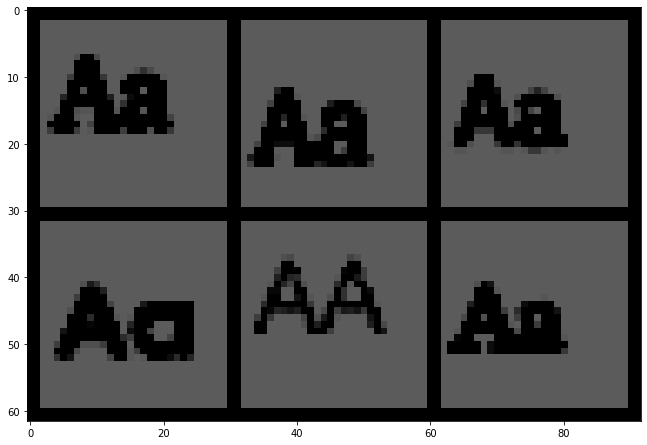

In [17]:
show_transformed_images(train_dataset)

In [19]:

#random_split randomly split a dataset into non-overlapping new datasets of given lengths
#train (55,000 images), val split (5,000 images)
#train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])
train_data, val_data = random_split(train_dataset, [830, 90])


batch_size=32

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

## 1.Define Encoder and Decoder classes

In [20]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, stride=2, padding=1)
        # out_width = (28+2-5)/2+1 = 27/2+1 = 13
        self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=1)
        self.batch2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, stride=2, padding=0)
        # out_width = (14-5)/2+1 = 5
        #self.drop1=nn.Dropout2d(p=0.3) 
        # 6 * 6 * 16 = 576
        self.linear1 = nn.Linear(3*3*32, 128)
        self.linear2 = nn.Linear(128, latent_dims)
        self.linear3 = nn.Linear(128, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        #print(x.shape)
        x = x.to(device)
        x = F.relu(self.conv1(x))
        x = F.relu(self.batch2(self.conv2(x)))
        x = F.relu(self.conv3(x))
        #print(x.shape)
        x = torch.flatten(x, start_dim=1)
        #print(x.shape)
        x = F.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z

In [21]:
class Decoder(nn.Module):
    
    def __init__(self, latent_dims):
        super().__init__()

        ### Linear section
        self.decoder_lin = nn.Sequential(
            # First linear layer
            nn.Linear(latent_dims, 128),
            nn.ReLU(True),
            # Second linear layer
            nn.Linear(128, 3 * 3 * 32),
            nn.ReLU(True)
        )

        ### Unflatten
        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(32, 3, 3))

        ### Convolutional section
        self.decoder_conv = nn.Sequential(
            # First transposed convolution
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            # Second transposed convolution
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            # Third transposed convolution
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1, output_padding=1)
        )
        
    def forward(self, x):
        # Apply linear layers
        x = self.decoder_lin(x)
        # Unflatten
        x = self.unflatten(x)
        # Apply transposed convolutions
        x = self.decoder_conv(x)
        # Apply a sigmoid to force the output to be between 0 and 1 (valid pixel values)
        x = torch.sigmoid(x)
        return x

In [22]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        x = x.to(device)
        z = self.encoder(x)
        return self.decoder(z)

## 2.Initialize model, optimizer, loss

In [23]:
### Set the random seed for reproducible results
torch.manual_seed(0)

d = 4

vae = VariationalAutoencoder(latent_dims=d)

lr = 1e-3 

optim = torch.optim.Adam(vae.parameters(), lr=lr, weight_decay=1e-5)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

vae.to(device)

Selected device: cuda


VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (batch2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (linear1): Linear(in_features=288, out_features=128, bias=True)
    (linear2): Linear(in_features=128, out_features=4, bias=True)
    (linear3): Linear(in_features=128, out_features=4, bias=True)
  )
  (decoder): Decoder(
    (decoder_lin): Sequential(
      (0): Linear(in_features=4, out_features=128, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=128, out_features=288, bias=True)
      (3): ReLU(inplace=True)
    )
    (unflatten): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (decoder_conv): Sequential(
      (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
      (1): BatchN

## 3.Training

In [24]:
### Training function
def train_epoch(vae, device, dataloader, optimizer):
    # Set train mode for both the encoder and the decoder
    vae.train()
    train_loss = 0.0
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for x, _ in dataloader: 
        # Move tensor to the proper device
        x = x.to(device)
        x_hat = vae(x)
        # Evaluate loss
        loss = ((x - x_hat)**2).sum() + vae.encoder.kl

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print batch loss
        print('\t partial train loss (single batch): %f' % (loss.item()))
        train_loss+=loss.item()

    return train_loss / len(dataloader.dataset)

In [25]:
### Testing function
def test_epoch(vae, device, dataloader):
    # Set evaluation mode for encoder and decoder
    vae.eval()
    val_loss = 0.0
    with torch.no_grad(): # No need to track the gradients
        for x, _ in dataloader:
            # Move tensor to the proper device
            x = x.to(device)
            # Encode data
            encoded_data = vae.encoder(x)
            # Decode data
            x_hat = vae(x)
            loss = ((x - x_hat)**2).sum() + vae.encoder.kl
            val_loss += loss.item()

    return val_loss / len(dataloader.dataset)

In [26]:
def plot_ae_outputs(encoder,decoder,n=5):
    plt.figure(figsize=(10,4.5))
    for i in range(n):
      ax = plt.subplot(2,n,i+1)
      img = test_dataset[i][0].unsqueeze(0).to(device)
      encoder.eval()
      decoder.eval()
      with torch.no_grad():
         rec_img  = decoder(encoder(img))
      plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.show()   

	 partial train loss (single batch): 38559.597656
	 partial train loss (single batch): 34570.425781
	 partial train loss (single batch): 35801.355469
	 partial train loss (single batch): 35504.441406
	 partial train loss (single batch): 45176.675781
	 partial train loss (single batch): 36947.753906
	 partial train loss (single batch): 36251.378906
	 partial train loss (single batch): 36770.351562
	 partial train loss (single batch): 36060.343750
	 partial train loss (single batch): 41106.578125
	 partial train loss (single batch): 27765.396484
	 partial train loss (single batch): 36729.097656
	 partial train loss (single batch): 36089.964844
	 partial train loss (single batch): 38048.964844
	 partial train loss (single batch): 34487.984375
	 partial train loss (single batch): 31226.195312
	 partial train loss (single batch): 31667.074219
	 partial train loss (single batch): 33404.613281
	 partial train loss (single batch): 31839.472656
	 partial train loss (single batch): 33227.484375


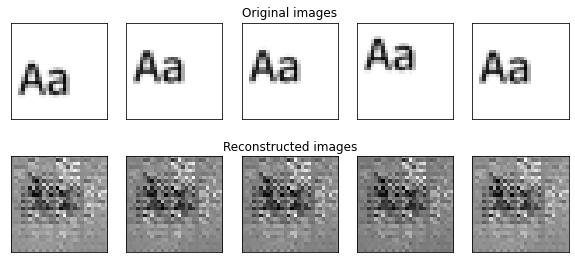

	 partial train loss (single batch): 34770.125000
	 partial train loss (single batch): 31106.521484
	 partial train loss (single batch): 32493.849609
	 partial train loss (single batch): 32408.408203
	 partial train loss (single batch): 41696.468750
	 partial train loss (single batch): 33970.199219
	 partial train loss (single batch): 33148.449219
	 partial train loss (single batch): 33813.761719
	 partial train loss (single batch): 33125.859375
	 partial train loss (single batch): 37970.531250
	 partial train loss (single batch): 25305.636719
	 partial train loss (single batch): 33821.097656
	 partial train loss (single batch): 33349.996094
	 partial train loss (single batch): 35313.710938
	 partial train loss (single batch): 31878.798828
	 partial train loss (single batch): 28701.984375
	 partial train loss (single batch): 29218.007812
	 partial train loss (single batch): 30881.718750
	 partial train loss (single batch): 29368.974609
	 partial train loss (single batch): 30682.962891


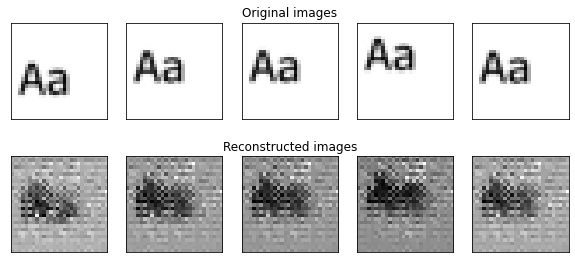

	 partial train loss (single batch): 32261.908203
	 partial train loss (single batch): 28673.880859
	 partial train loss (single batch): 30154.203125
	 partial train loss (single batch): 30098.708984
	 partial train loss (single batch): 39055.929688
	 partial train loss (single batch): 31586.896484
	 partial train loss (single batch): 30813.917969
	 partial train loss (single batch): 31428.939453
	 partial train loss (single batch): 30860.570312
	 partial train loss (single batch): 35526.234375
	 partial train loss (single batch): 23418.869141
	 partial train loss (single batch): 31597.685547
	 partial train loss (single batch): 31146.517578
	 partial train loss (single batch): 32986.546875
	 partial train loss (single batch): 29788.146484
	 partial train loss (single batch): 26773.677734
	 partial train loss (single batch): 27146.238281
	 partial train loss (single batch): 28833.898438
	 partial train loss (single batch): 27411.751953
	 partial train loss (single batch): 28737.902344


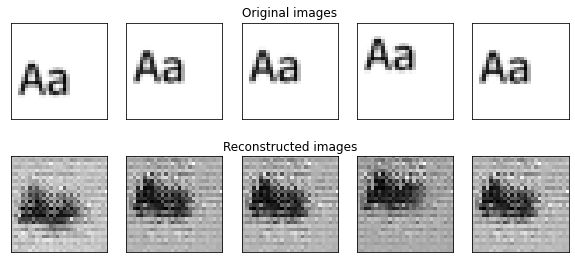

	 partial train loss (single batch): 30377.111328
	 partial train loss (single batch): 26996.195312
	 partial train loss (single batch): 28397.212891
	 partial train loss (single batch): 28344.492188
	 partial train loss (single batch): 36970.730469
	 partial train loss (single batch): 29836.167969
	 partial train loss (single batch): 29078.828125
	 partial train loss (single batch): 29726.968750
	 partial train loss (single batch): 29211.644531
	 partial train loss (single batch): 33633.445312
	 partial train loss (single batch): 22011.140625
	 partial train loss (single batch): 29918.617188
	 partial train loss (single batch): 29484.404297
	 partial train loss (single batch): 31255.945312
	 partial train loss (single batch): 28133.505859
	 partial train loss (single batch): 25298.013672
	 partial train loss (single batch): 25677.798828
	 partial train loss (single batch): 27293.996094
	 partial train loss (single batch): 25948.974609
	 partial train loss (single batch): 27191.912109


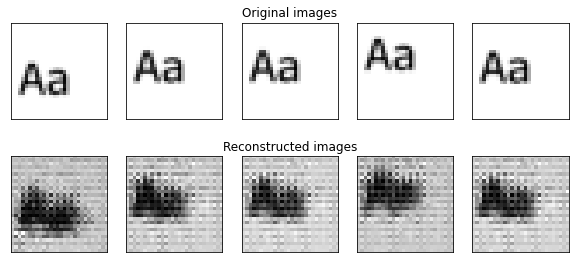

	 partial train loss (single batch): 28878.109375
	 partial train loss (single batch): 25650.910156
	 partial train loss (single batch): 26979.851562
	 partial train loss (single batch): 26831.328125
	 partial train loss (single batch): 35248.167969
	 partial train loss (single batch): 28386.851562
	 partial train loss (single batch): 27735.753906
	 partial train loss (single batch): 28369.447266
	 partial train loss (single batch): 27948.996094
	 partial train loss (single batch): 32248.708984
	 partial train loss (single batch): 20978.537109
	 partial train loss (single batch): 28662.587891
	 partial train loss (single batch): 28213.457031
	 partial train loss (single batch): 29938.191406
	 partial train loss (single batch): 26934.785156
	 partial train loss (single batch): 24273.548828
	 partial train loss (single batch): 24640.583984
	 partial train loss (single batch): 26267.234375
	 partial train loss (single batch): 24983.601562
	 partial train loss (single batch): 26175.371094


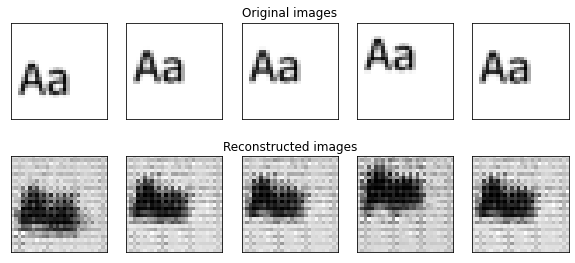

	 partial train loss (single batch): 27923.570312
	 partial train loss (single batch): 24840.027344
	 partial train loss (single batch): 26152.134766
	 partial train loss (single batch): 25948.404297
	 partial train loss (single batch): 34203.339844
	 partial train loss (single batch): 27535.048828
	 partial train loss (single batch): 26960.593750
	 partial train loss (single batch): 27576.226562
	 partial train loss (single batch): 27190.951172
	 partial train loss (single batch): 31460.878906
	 partial train loss (single batch): 20389.847656
	 partial train loss (single batch): 27930.566406
	 partial train loss (single batch): 27506.705078
	 partial train loss (single batch): 29223.605469
	 partial train loss (single batch): 26247.625000
	 partial train loss (single batch): 23635.359375
	 partial train loss (single batch): 24089.847656
	 partial train loss (single batch): 25674.589844
	 partial train loss (single batch): 24381.246094
	 partial train loss (single batch): 25579.673828


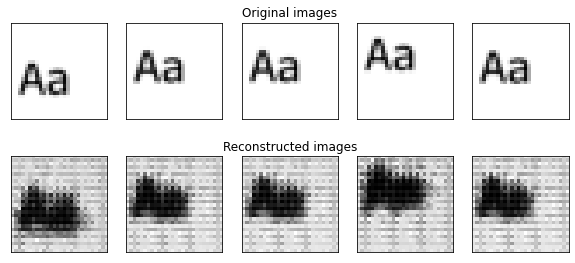

	 partial train loss (single batch): 27338.187500
	 partial train loss (single batch): 24345.427734
	 partial train loss (single batch): 25608.683594
	 partial train loss (single batch): 25422.472656
	 partial train loss (single batch): 33575.472656
	 partial train loss (single batch): 26964.541016
	 partial train loss (single batch): 26465.439453
	 partial train loss (single batch): 27065.962891
	 partial train loss (single batch): 26691.671875
	 partial train loss (single batch): 30896.771484
	 partial train loss (single batch): 20013.509766
	 partial train loss (single batch): 27468.501953
	 partial train loss (single batch): 27039.072266
	 partial train loss (single batch): 28759.892578
	 partial train loss (single batch): 25807.273438
	 partial train loss (single batch): 23274.644531
	 partial train loss (single batch): 23690.570312
	 partial train loss (single batch): 25314.181641
	 partial train loss (single batch): 24002.255859
	 partial train loss (single batch): 25184.044922


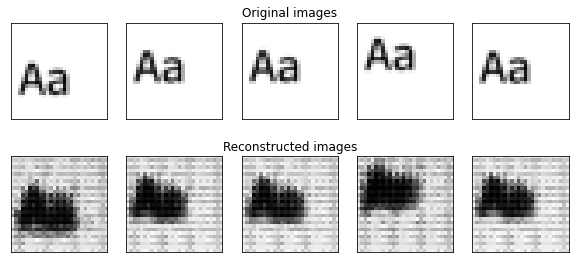

	 partial train loss (single batch): 26984.003906
	 partial train loss (single batch): 24034.078125
	 partial train loss (single batch): 25292.246094
	 partial train loss (single batch): 25076.453125
	 partial train loss (single batch): 33168.441406
	 partial train loss (single batch): 26639.548828
	 partial train loss (single batch): 26138.335938
	 partial train loss (single batch): 26747.171875
	 partial train loss (single batch): 26370.324219
	 partial train loss (single batch): 30571.253906
	 partial train loss (single batch): 19788.697266
	 partial train loss (single batch): 27152.291016
	 partial train loss (single batch): 26727.902344
	 partial train loss (single batch): 28456.744141
	 partial train loss (single batch): 25521.419922
	 partial train loss (single batch): 22985.835938
	 partial train loss (single batch): 23434.751953
	 partial train loss (single batch): 25090.935547
	 partial train loss (single batch): 23782.349609
	 partial train loss (single batch): 24973.162109


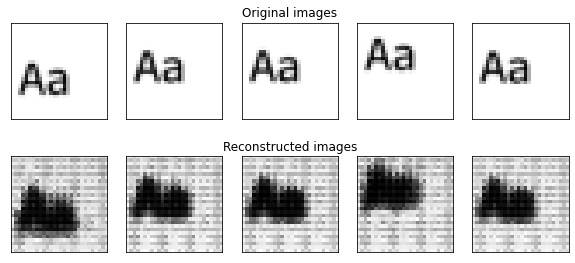

	 partial train loss (single batch): 26760.652344
	 partial train loss (single batch): 23843.277344
	 partial train loss (single batch): 25047.000000
	 partial train loss (single batch): 24848.916016
	 partial train loss (single batch): 32899.718750
	 partial train loss (single batch): 26407.285156
	 partial train loss (single batch): 25946.326172
	 partial train loss (single batch): 26542.156250
	 partial train loss (single batch): 26198.103516
	 partial train loss (single batch): 30385.921875
	 partial train loss (single batch): 19646.835938
	 partial train loss (single batch): 26971.384766
	 partial train loss (single batch): 26508.562500
	 partial train loss (single batch): 28249.724609
	 partial train loss (single batch): 25361.292969
	 partial train loss (single batch): 22840.720703
	 partial train loss (single batch): 23298.513672
	 partial train loss (single batch): 24918.773438
	 partial train loss (single batch): 23611.527344
	 partial train loss (single batch): 24806.687500


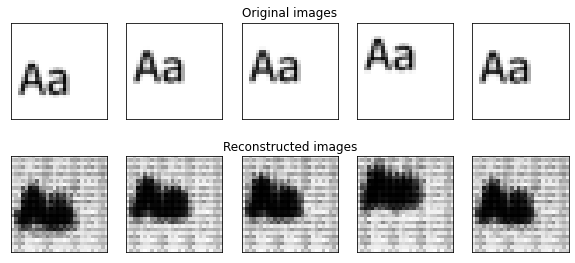

	 partial train loss (single batch): 26594.224609
	 partial train loss (single batch): 23687.162109
	 partial train loss (single batch): 24909.861328
	 partial train loss (single batch): 24735.013672
	 partial train loss (single batch): 32717.433594
	 partial train loss (single batch): 26256.892578
	 partial train loss (single batch): 25818.148438
	 partial train loss (single batch): 26377.835938
	 partial train loss (single batch): 26021.218750
	 partial train loss (single batch): 30216.357422
	 partial train loss (single batch): 19501.634766
	 partial train loss (single batch): 26823.238281
	 partial train loss (single batch): 26395.214844
	 partial train loss (single batch): 28126.677734
	 partial train loss (single batch): 25201.429688
	 partial train loss (single batch): 22735.068359
	 partial train loss (single batch): 23177.957031
	 partial train loss (single batch): 24800.365234
	 partial train loss (single batch): 23482.929688
	 partial train loss (single batch): 24687.597656


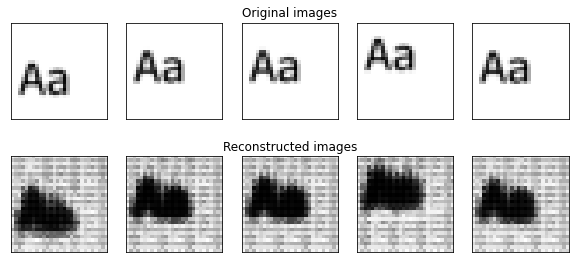

	 partial train loss (single batch): 26481.470703
	 partial train loss (single batch): 23609.361328
	 partial train loss (single batch): 24790.664062
	 partial train loss (single batch): 24617.589844
	 partial train loss (single batch): 32580.986328
	 partial train loss (single batch): 26138.871094
	 partial train loss (single batch): 25709.771484
	 partial train loss (single batch): 26283.285156
	 partial train loss (single batch): 25927.349609
	 partial train loss (single batch): 30120.890625
	 partial train loss (single batch): 19430.375000
	 partial train loss (single batch): 26733.679688
	 partial train loss (single batch): 26276.847656
	 partial train loss (single batch): 28031.097656
	 partial train loss (single batch): 25119.658203
	 partial train loss (single batch): 22613.501953
	 partial train loss (single batch): 23103.960938
	 partial train loss (single batch): 24719.669922
	 partial train loss (single batch): 23381.263672
	 partial train loss (single batch): 24599.298828


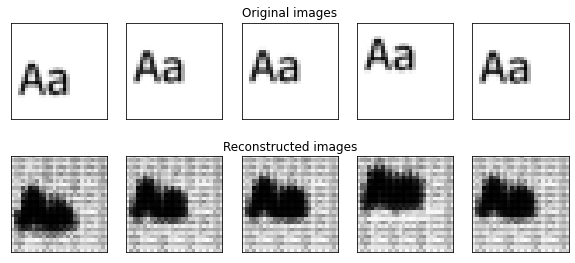

	 partial train loss (single batch): 26370.306641
	 partial train loss (single batch): 23525.189453
	 partial train loss (single batch): 24701.394531
	 partial train loss (single batch): 24532.892578
	 partial train loss (single batch): 32498.906250
	 partial train loss (single batch): 26069.816406
	 partial train loss (single batch): 25640.066406
	 partial train loss (single batch): 26226.556641
	 partial train loss (single batch): 25845.054688
	 partial train loss (single batch): 30054.275391
	 partial train loss (single batch): 19362.613281
	 partial train loss (single batch): 26665.386719
	 partial train loss (single batch): 26211.750000
	 partial train loss (single batch): 27960.341797
	 partial train loss (single batch): 25054.970703
	 partial train loss (single batch): 22558.632812
	 partial train loss (single batch): 23046.445312
	 partial train loss (single batch): 24666.875000
	 partial train loss (single batch): 23326.839844
	 partial train loss (single batch): 24538.162109


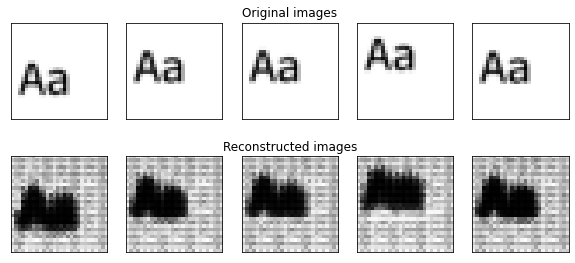

	 partial train loss (single batch): 26302.294922
	 partial train loss (single batch): 23473.425781
	 partial train loss (single batch): 24672.572266
	 partial train loss (single batch): 24453.527344
	 partial train loss (single batch): 32435.533203
	 partial train loss (single batch): 26003.789062
	 partial train loss (single batch): 25575.656250
	 partial train loss (single batch): 26155.376953
	 partial train loss (single batch): 25817.855469
	 partial train loss (single batch): 29979.228516
	 partial train loss (single batch): 19327.158203
	 partial train loss (single batch): 26591.720703
	 partial train loss (single batch): 26197.753906
	 partial train loss (single batch): 27892.898438
	 partial train loss (single batch): 24994.763672
	 partial train loss (single batch): 22502.970703
	 partial train loss (single batch): 22978.734375
	 partial train loss (single batch): 24634.974609
	 partial train loss (single batch): 23292.835938
	 partial train loss (single batch): 24536.505859


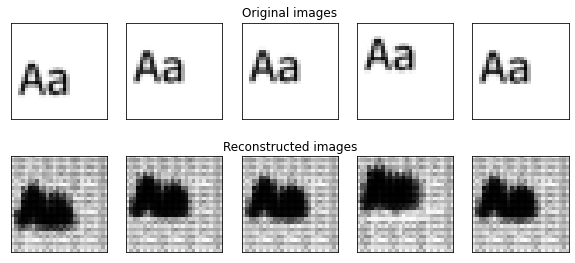

	 partial train loss (single batch): 26308.957031
	 partial train loss (single batch): 23451.781250
	 partial train loss (single batch): 24606.994141
	 partial train loss (single batch): 24422.515625
	 partial train loss (single batch): 32382.791016
	 partial train loss (single batch): 25964.523438
	 partial train loss (single batch): 25556.150391
	 partial train loss (single batch): 26106.775391
	 partial train loss (single batch): 25784.128906
	 partial train loss (single batch): 29931.880859
	 partial train loss (single batch): 19300.333984
	 partial train loss (single batch): 26573.423828
	 partial train loss (single batch): 26157.542969
	 partial train loss (single batch): 27861.289062
	 partial train loss (single batch): 24950.490234
	 partial train loss (single batch): 22480.597656
	 partial train loss (single batch): 22964.328125
	 partial train loss (single batch): 24600.789062
	 partial train loss (single batch): 23265.533203
	 partial train loss (single batch): 24457.570312


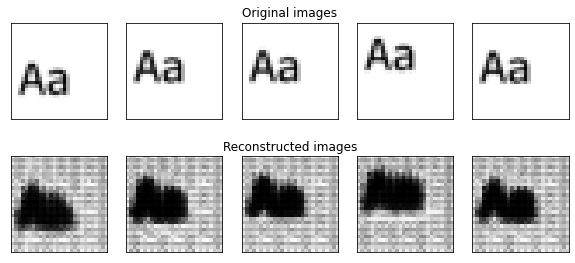

	 partial train loss (single batch): 26231.578125
	 partial train loss (single batch): 23421.474609
	 partial train loss (single batch): 24576.960938
	 partial train loss (single batch): 24399.775391
	 partial train loss (single batch): 32338.291016
	 partial train loss (single batch): 25909.541016
	 partial train loss (single batch): 25515.824219
	 partial train loss (single batch): 26091.996094
	 partial train loss (single batch): 25715.720703
	 partial train loss (single batch): 29909.908203
	 partial train loss (single batch): 19282.222656
	 partial train loss (single batch): 26553.146484
	 partial train loss (single batch): 26100.750000
	 partial train loss (single batch): 27820.718750
	 partial train loss (single batch): 24931.498047
	 partial train loss (single batch): 22447.939453
	 partial train loss (single batch): 22936.097656
	 partial train loss (single batch): 24591.179688
	 partial train loss (single batch): 23213.875000
	 partial train loss (single batch): 24443.542969


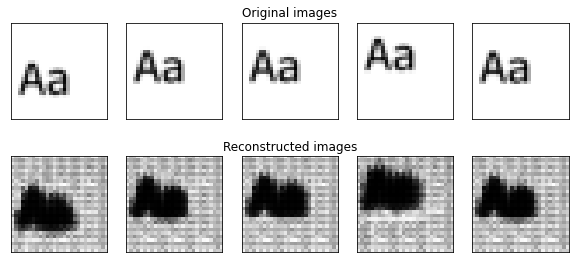

	 partial train loss (single batch): 26186.232422
	 partial train loss (single batch): 23386.710938
	 partial train loss (single batch): 24554.855469
	 partial train loss (single batch): 24351.455078
	 partial train loss (single batch): 32304.080078
	 partial train loss (single batch): 25890.613281
	 partial train loss (single batch): 25497.542969
	 partial train loss (single batch): 26059.166016
	 partial train loss (single batch): 25704.189453
	 partial train loss (single batch): 29887.361328
	 partial train loss (single batch): 19244.564453
	 partial train loss (single batch): 26496.880859
	 partial train loss (single batch): 26041.990234
	 partial train loss (single batch): 27809.343750
	 partial train loss (single batch): 24892.460938
	 partial train loss (single batch): 22418.082031
	 partial train loss (single batch): 22903.496094
	 partial train loss (single batch): 24529.605469
	 partial train loss (single batch): 23196.205078
	 partial train loss (single batch): 24408.734375


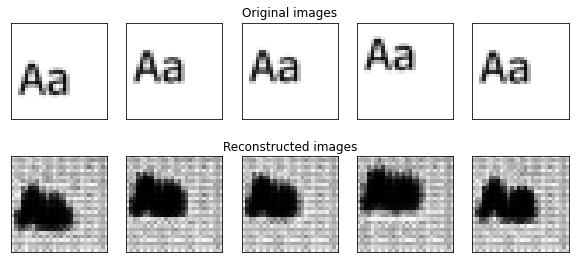

	 partial train loss (single batch): 26178.248047
	 partial train loss (single batch): 23371.740234
	 partial train loss (single batch): 24542.314453
	 partial train loss (single batch): 24310.156250
	 partial train loss (single batch): 32297.628906
	 partial train loss (single batch): 25859.769531
	 partial train loss (single batch): 25474.113281
	 partial train loss (single batch): 26035.197266
	 partial train loss (single batch): 25679.970703
	 partial train loss (single batch): 29847.164062
	 partial train loss (single batch): 19227.964844
	 partial train loss (single batch): 26464.576172
	 partial train loss (single batch): 26019.046875
	 partial train loss (single batch): 27778.523438
	 partial train loss (single batch): 24886.953125
	 partial train loss (single batch): 22388.628906
	 partial train loss (single batch): 22894.521484
	 partial train loss (single batch): 24503.701172
	 partial train loss (single batch): 23198.437500
	 partial train loss (single batch): 24379.009766


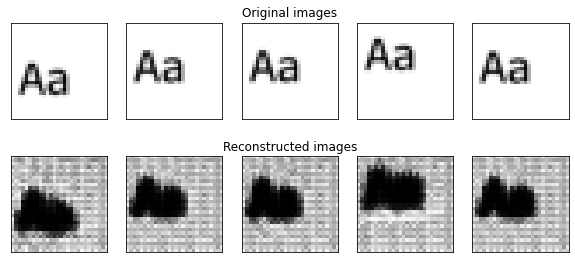

	 partial train loss (single batch): 26163.630859
	 partial train loss (single batch): 23338.816406
	 partial train loss (single batch): 24505.304688
	 partial train loss (single batch): 24291.671875
	 partial train loss (single batch): 32262.451172
	 partial train loss (single batch): 25823.597656
	 partial train loss (single batch): 25444.449219
	 partial train loss (single batch): 26024.333984
	 partial train loss (single batch): 25658.488281
	 partial train loss (single batch): 29814.601562
	 partial train loss (single batch): 19196.974609
	 partial train loss (single batch): 26450.123047
	 partial train loss (single batch): 26001.857422
	 partial train loss (single batch): 27754.392578
	 partial train loss (single batch): 24861.314453
	 partial train loss (single batch): 22380.367188
	 partial train loss (single batch): 22853.853516
	 partial train loss (single batch): 24513.537109
	 partial train loss (single batch): 23167.958984
	 partial train loss (single batch): 24369.283203


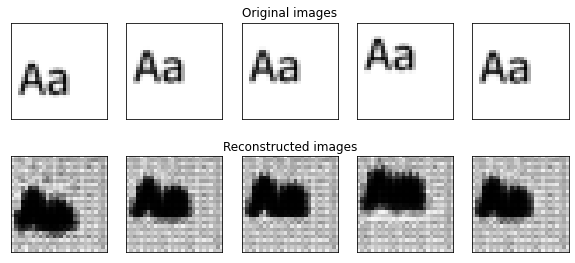

	 partial train loss (single batch): 26127.541016
	 partial train loss (single batch): 23335.167969
	 partial train loss (single batch): 24486.683594
	 partial train loss (single batch): 24295.138672
	 partial train loss (single batch): 32233.916016
	 partial train loss (single batch): 25809.773438
	 partial train loss (single batch): 25424.230469
	 partial train loss (single batch): 25985.302734
	 partial train loss (single batch): 25648.833984
	 partial train loss (single batch): 29793.121094
	 partial train loss (single batch): 19194.005859
	 partial train loss (single batch): 26443.189453
	 partial train loss (single batch): 25984.804688
	 partial train loss (single batch): 27724.191406
	 partial train loss (single batch): 24836.505859
	 partial train loss (single batch): 22361.683594
	 partial train loss (single batch): 22839.763672
	 partial train loss (single batch): 24469.232422
	 partial train loss (single batch): 23160.017578
	 partial train loss (single batch): 24331.501953


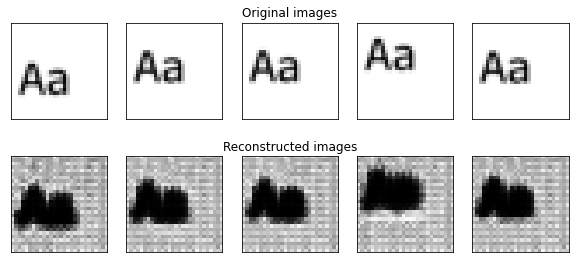

	 partial train loss (single batch): 26113.730469
	 partial train loss (single batch): 23323.232422
	 partial train loss (single batch): 24448.767578
	 partial train loss (single batch): 24263.730469
	 partial train loss (single batch): 32201.835938
	 partial train loss (single batch): 25820.103516
	 partial train loss (single batch): 25412.880859
	 partial train loss (single batch): 25979.292969
	 partial train loss (single batch): 25607.302734
	 partial train loss (single batch): 29790.335938
	 partial train loss (single batch): 19175.302734
	 partial train loss (single batch): 26418.615234
	 partial train loss (single batch): 26008.628906
	 partial train loss (single batch): 27732.503906
	 partial train loss (single batch): 24813.980469
	 partial train loss (single batch): 22354.867188
	 partial train loss (single batch): 22839.935547
	 partial train loss (single batch): 24466.966797
	 partial train loss (single batch): 23125.978516
	 partial train loss (single batch): 24337.753906


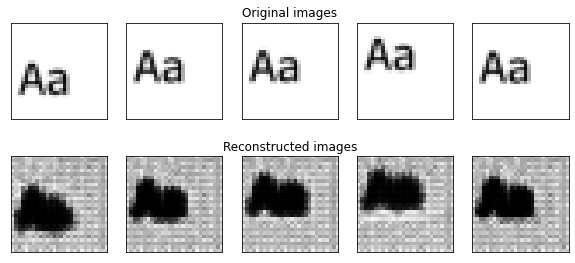

	 partial train loss (single batch): 26106.410156
	 partial train loss (single batch): 23296.871094
	 partial train loss (single batch): 24436.380859
	 partial train loss (single batch): 24245.167969
	 partial train loss (single batch): 32197.871094
	 partial train loss (single batch): 25806.408203
	 partial train loss (single batch): 25408.267578
	 partial train loss (single batch): 25951.878906
	 partial train loss (single batch): 25598.662109
	 partial train loss (single batch): 29786.660156
	 partial train loss (single batch): 19181.478516
	 partial train loss (single batch): 26401.460938
	 partial train loss (single batch): 25964.412109
	 partial train loss (single batch): 27708.173828
	 partial train loss (single batch): 24809.134766
	 partial train loss (single batch): 22342.832031
	 partial train loss (single batch): 22835.806641
	 partial train loss (single batch): 24446.894531
	 partial train loss (single batch): 23108.410156
	 partial train loss (single batch): 24325.685547


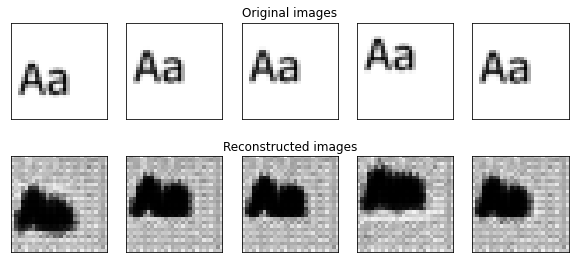

	 partial train loss (single batch): 26099.240234
	 partial train loss (single batch): 23312.162109
	 partial train loss (single batch): 24452.904297
	 partial train loss (single batch): 24248.621094
	 partial train loss (single batch): 32162.865234
	 partial train loss (single batch): 25788.566406
	 partial train loss (single batch): 25391.226562
	 partial train loss (single batch): 25974.224609
	 partial train loss (single batch): 25606.099609
	 partial train loss (single batch): 29768.746094
	 partial train loss (single batch): 19162.941406
	 partial train loss (single batch): 26400.882812
	 partial train loss (single batch): 25990.701172
	 partial train loss (single batch): 27700.732422
	 partial train loss (single batch): 24812.861328
	 partial train loss (single batch): 22329.755859
	 partial train loss (single batch): 22806.535156
	 partial train loss (single batch): 24467.029297
	 partial train loss (single batch): 23105.513672
	 partial train loss (single batch): 24310.814453


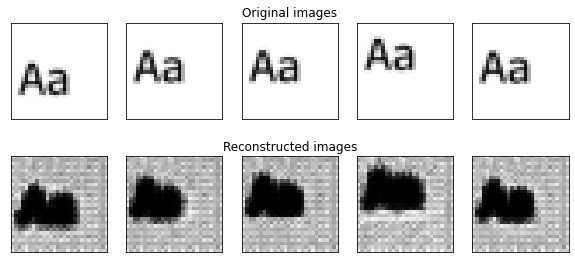

	 partial train loss (single batch): 26108.505859
	 partial train loss (single batch): 23286.404297
	 partial train loss (single batch): 24446.371094
	 partial train loss (single batch): 24237.697266
	 partial train loss (single batch): 32165.726562
	 partial train loss (single batch): 25770.873047
	 partial train loss (single batch): 25383.691406
	 partial train loss (single batch): 25965.201172
	 partial train loss (single batch): 25580.222656
	 partial train loss (single batch): 29742.628906
	 partial train loss (single batch): 19147.820312
	 partial train loss (single batch): 26394.167969
	 partial train loss (single batch): 25948.488281
	 partial train loss (single batch): 27682.070312
	 partial train loss (single batch): 24775.496094
	 partial train loss (single batch): 22325.078125
	 partial train loss (single batch): 22808.421875
	 partial train loss (single batch): 24439.015625
	 partial train loss (single batch): 23091.783203
	 partial train loss (single batch): 24322.302734


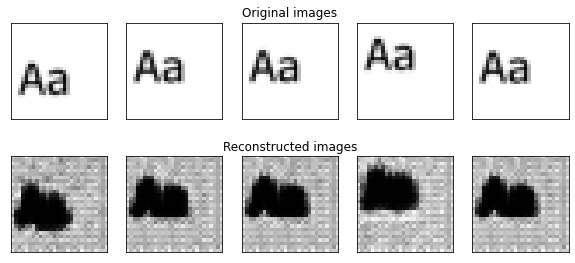

	 partial train loss (single batch): 26090.701172
	 partial train loss (single batch): 23293.570312
	 partial train loss (single batch): 24434.107422
	 partial train loss (single batch): 24233.769531
	 partial train loss (single batch): 32168.679688
	 partial train loss (single batch): 25760.996094
	 partial train loss (single batch): 25374.794922
	 partial train loss (single batch): 25928.474609
	 partial train loss (single batch): 25558.246094
	 partial train loss (single batch): 29743.699219
	 partial train loss (single batch): 19147.687500
	 partial train loss (single batch): 26368.173828
	 partial train loss (single batch): 25919.175781
	 partial train loss (single batch): 27676.091797
	 partial train loss (single batch): 24786.898438
	 partial train loss (single batch): 22297.134766
	 partial train loss (single batch): 22786.603516
	 partial train loss (single batch): 24435.267578
	 partial train loss (single batch): 23079.779297
	 partial train loss (single batch): 24291.691406


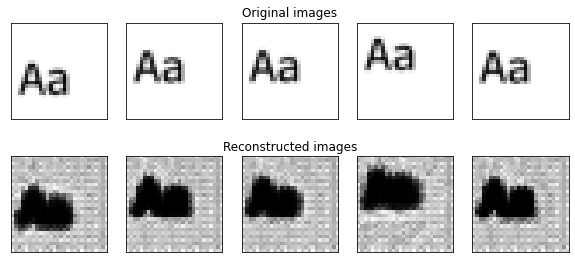

	 partial train loss (single batch): 26079.376953
	 partial train loss (single batch): 23279.138672
	 partial train loss (single batch): 24414.599609
	 partial train loss (single batch): 24221.259766
	 partial train loss (single batch): 32144.636719
	 partial train loss (single batch): 25771.699219
	 partial train loss (single batch): 25382.015625
	 partial train loss (single batch): 25930.351562
	 partial train loss (single batch): 25569.552734
	 partial train loss (single batch): 29731.359375
	 partial train loss (single batch): 19138.048828
	 partial train loss (single batch): 26414.873047
	 partial train loss (single batch): 25939.353516
	 partial train loss (single batch): 27663.689453
	 partial train loss (single batch): 24773.921875
	 partial train loss (single batch): 22327.656250
	 partial train loss (single batch): 22806.427734
	 partial train loss (single batch): 24426.126953
	 partial train loss (single batch): 23091.576172
	 partial train loss (single batch): 24308.525391


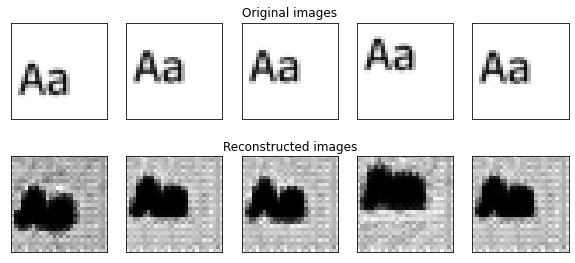

	 partial train loss (single batch): 26054.318359
	 partial train loss (single batch): 23259.226562
	 partial train loss (single batch): 24413.230469
	 partial train loss (single batch): 24236.990234
	 partial train loss (single batch): 32163.093750
	 partial train loss (single batch): 25749.765625
	 partial train loss (single batch): 25368.853516
	 partial train loss (single batch): 25951.005859
	 partial train loss (single batch): 25572.359375
	 partial train loss (single batch): 29731.244141
	 partial train loss (single batch): 19152.781250
	 partial train loss (single batch): 26406.578125
	 partial train loss (single batch): 25929.859375
	 partial train loss (single batch): 27659.187500
	 partial train loss (single batch): 24753.837891
	 partial train loss (single batch): 22317.730469
	 partial train loss (single batch): 22793.380859
	 partial train loss (single batch): 24418.330078
	 partial train loss (single batch): 23086.498047
	 partial train loss (single batch): 24280.160156


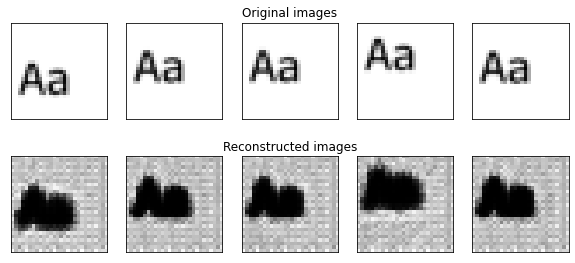

	 partial train loss (single batch): 26068.849609
	 partial train loss (single batch): 23273.742188
	 partial train loss (single batch): 24406.615234
	 partial train loss (single batch): 24199.632812
	 partial train loss (single batch): 32161.402344
	 partial train loss (single batch): 25753.203125
	 partial train loss (single batch): 25365.816406
	 partial train loss (single batch): 25928.457031
	 partial train loss (single batch): 25559.253906
	 partial train loss (single batch): 29718.531250
	 partial train loss (single batch): 19126.722656
	 partial train loss (single batch): 26355.691406
	 partial train loss (single batch): 25920.425781
	 partial train loss (single batch): 27673.789062
	 partial train loss (single batch): 24773.562500
	 partial train loss (single batch): 22296.462891
	 partial train loss (single batch): 22783.519531
	 partial train loss (single batch): 24415.832031
	 partial train loss (single batch): 23089.849609
	 partial train loss (single batch): 24302.429688


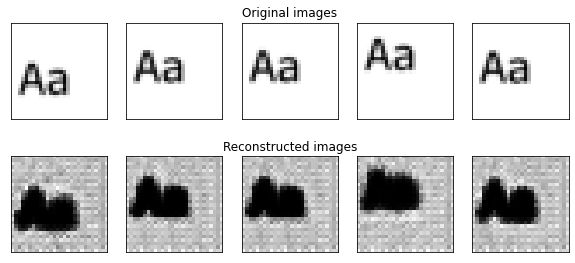

	 partial train loss (single batch): 26043.597656
	 partial train loss (single batch): 23258.011719
	 partial train loss (single batch): 24409.332031
	 partial train loss (single batch): 24225.925781
	 partial train loss (single batch): 32127.642578
	 partial train loss (single batch): 25746.957031
	 partial train loss (single batch): 25352.744141
	 partial train loss (single batch): 25933.121094
	 partial train loss (single batch): 25559.871094
	 partial train loss (single batch): 29705.722656
	 partial train loss (single batch): 19122.292969
	 partial train loss (single batch): 26346.367188
	 partial train loss (single batch): 25924.701172
	 partial train loss (single batch): 27678.349609
	 partial train loss (single batch): 24766.960938
	 partial train loss (single batch): 22293.675781
	 partial train loss (single batch): 22787.902344
	 partial train loss (single batch): 24438.714844
	 partial train loss (single batch): 23071.355469
	 partial train loss (single batch): 24301.535156


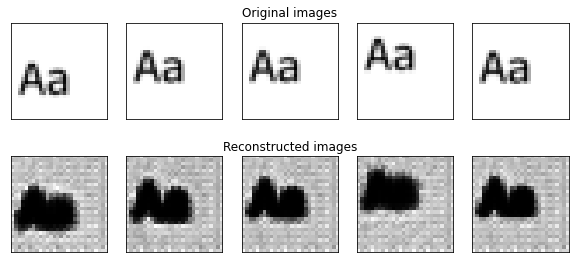

	 partial train loss (single batch): 26042.103516
	 partial train loss (single batch): 23270.984375
	 partial train loss (single batch): 24403.830078
	 partial train loss (single batch): 24193.685547
	 partial train loss (single batch): 32099.472656
	 partial train loss (single batch): 25718.662109
	 partial train loss (single batch): 25360.658203
	 partial train loss (single batch): 25907.707031
	 partial train loss (single batch): 25540.052734
	 partial train loss (single batch): 29707.964844
	 partial train loss (single batch): 19113.554688
	 partial train loss (single batch): 26367.890625
	 partial train loss (single batch): 25971.111328
	 partial train loss (single batch): 27654.937500
	 partial train loss (single batch): 24767.402344
	 partial train loss (single batch): 22299.531250
	 partial train loss (single batch): 22798.671875
	 partial train loss (single batch): 24425.794922
	 partial train loss (single batch): 23078.757812
	 partial train loss (single batch): 24280.505859


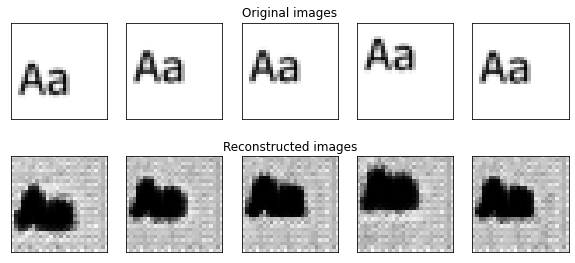

	 partial train loss (single batch): 26033.851562
	 partial train loss (single batch): 23250.000000
	 partial train loss (single batch): 24467.664062
	 partial train loss (single batch): 24199.255859
	 partial train loss (single batch): 32099.025391
	 partial train loss (single batch): 25717.476562
	 partial train loss (single batch): 25385.896484
	 partial train loss (single batch): 25928.046875
	 partial train loss (single batch): 25554.259766
	 partial train loss (single batch): 29731.894531
	 partial train loss (single batch): 19126.044922
	 partial train loss (single batch): 26354.833984
	 partial train loss (single batch): 25903.042969
	 partial train loss (single batch): 27647.486328
	 partial train loss (single batch): 24746.578125
	 partial train loss (single batch): 22280.527344
	 partial train loss (single batch): 22772.582031
	 partial train loss (single batch): 24415.173828
	 partial train loss (single batch): 23083.400391
	 partial train loss (single batch): 24281.255859


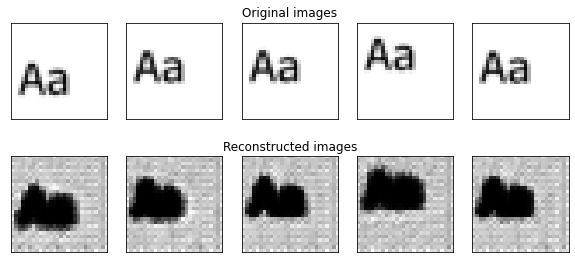

	 partial train loss (single batch): 26050.000000
	 partial train loss (single batch): 23263.273438
	 partial train loss (single batch): 24395.433594
	 partial train loss (single batch): 24197.933594
	 partial train loss (single batch): 32097.099609
	 partial train loss (single batch): 25717.076172
	 partial train loss (single batch): 25347.242188
	 partial train loss (single batch): 25900.583984
	 partial train loss (single batch): 25549.841797
	 partial train loss (single batch): 29727.402344
	 partial train loss (single batch): 19112.703125
	 partial train loss (single batch): 26352.220703
	 partial train loss (single batch): 25905.828125
	 partial train loss (single batch): 27617.066406
	 partial train loss (single batch): 24747.378906
	 partial train loss (single batch): 22293.052734
	 partial train loss (single batch): 22761.787109
	 partial train loss (single batch): 24386.529297
	 partial train loss (single batch): 23060.023438
	 partial train loss (single batch): 24260.394531


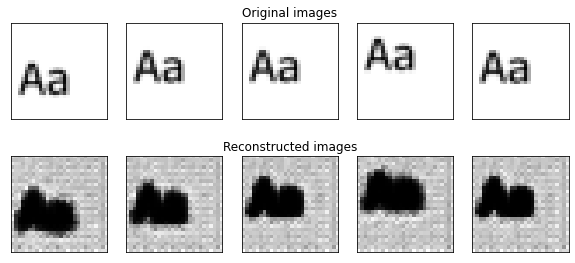

	 partial train loss (single batch): 26078.707031
	 partial train loss (single batch): 23259.972656
	 partial train loss (single batch): 24394.109375
	 partial train loss (single batch): 24193.199219
	 partial train loss (single batch): 32092.169922
	 partial train loss (single batch): 25717.751953
	 partial train loss (single batch): 25348.839844
	 partial train loss (single batch): 25916.736328
	 partial train loss (single batch): 25543.537109
	 partial train loss (single batch): 29721.007812
	 partial train loss (single batch): 19113.902344
	 partial train loss (single batch): 26349.625000
	 partial train loss (single batch): 25883.882812
	 partial train loss (single batch): 27636.605469
	 partial train loss (single batch): 24762.636719
	 partial train loss (single batch): 22302.671875
	 partial train loss (single batch): 22745.560547
	 partial train loss (single batch): 24415.382812
	 partial train loss (single batch): 23040.345703
	 partial train loss (single batch): 24283.451172


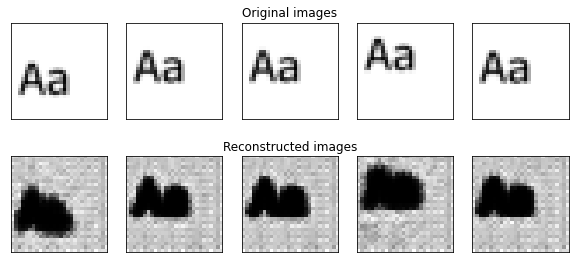

	 partial train loss (single batch): 26035.531250
	 partial train loss (single batch): 23249.900391
	 partial train loss (single batch): 24408.556641
	 partial train loss (single batch): 24209.525391
	 partial train loss (single batch): 32125.419922
	 partial train loss (single batch): 25716.675781
	 partial train loss (single batch): 25344.818359
	 partial train loss (single batch): 25895.779297
	 partial train loss (single batch): 25535.353516
	 partial train loss (single batch): 29696.343750
	 partial train loss (single batch): 19107.740234
	 partial train loss (single batch): 26334.242188
	 partial train loss (single batch): 25890.746094
	 partial train loss (single batch): 27643.195312
	 partial train loss (single batch): 24759.992188
	 partial train loss (single batch): 22274.929688
	 partial train loss (single batch): 22766.767578
	 partial train loss (single batch): 24372.476562
	 partial train loss (single batch): 23044.921875
	 partial train loss (single batch): 24263.330078


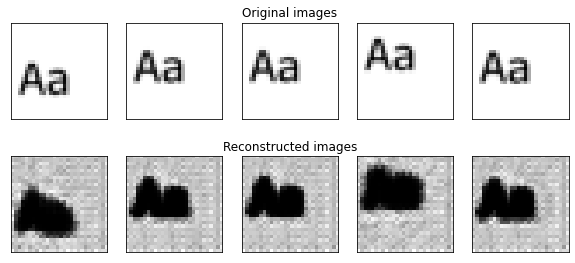

	 partial train loss (single batch): 26043.220703
	 partial train loss (single batch): 23244.992188
	 partial train loss (single batch): 24381.712891
	 partial train loss (single batch): 24177.390625
	 partial train loss (single batch): 32067.585938
	 partial train loss (single batch): 25707.355469
	 partial train loss (single batch): 25406.681641
	 partial train loss (single batch): 25880.691406
	 partial train loss (single batch): 25545.898438
	 partial train loss (single batch): 29711.662109
	 partial train loss (single batch): 19115.992188
	 partial train loss (single batch): 26353.105469
	 partial train loss (single batch): 25889.445312
	 partial train loss (single batch): 27623.238281
	 partial train loss (single batch): 24734.013672
	 partial train loss (single batch): 22273.835938
	 partial train loss (single batch): 22754.646484
	 partial train loss (single batch): 24413.509766
	 partial train loss (single batch): 23101.011719
	 partial train loss (single batch): 24272.001953


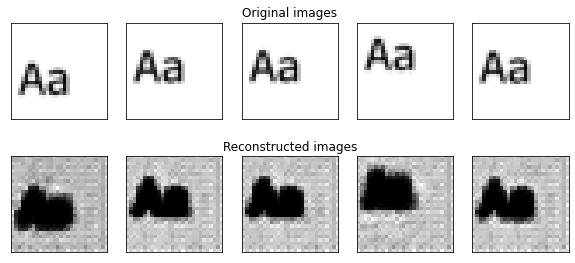

	 partial train loss (single batch): 26052.121094
	 partial train loss (single batch): 23229.644531
	 partial train loss (single batch): 24383.205078
	 partial train loss (single batch): 24180.248047
	 partial train loss (single batch): 32083.330078
	 partial train loss (single batch): 25724.611328
	 partial train loss (single batch): 25329.613281
	 partial train loss (single batch): 25872.636719
	 partial train loss (single batch): 25548.697266
	 partial train loss (single batch): 29697.949219
	 partial train loss (single batch): 19108.500000
	 partial train loss (single batch): 26346.166016
	 partial train loss (single batch): 25887.830078
	 partial train loss (single batch): 27605.968750
	 partial train loss (single batch): 24739.908203
	 partial train loss (single batch): 22278.568359
	 partial train loss (single batch): 22759.677734
	 partial train loss (single batch): 24399.501953
	 partial train loss (single batch): 23051.156250
	 partial train loss (single batch): 24286.169922


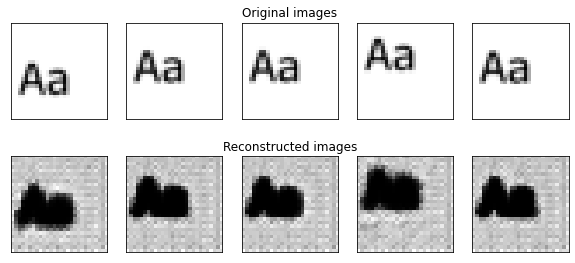

	 partial train loss (single batch): 26030.212891
	 partial train loss (single batch): 23235.230469
	 partial train loss (single batch): 24369.847656
	 partial train loss (single batch): 24180.693359
	 partial train loss (single batch): 32115.275391
	 partial train loss (single batch): 25712.173828
	 partial train loss (single batch): 25335.632812
	 partial train loss (single batch): 25888.949219
	 partial train loss (single batch): 25529.003906
	 partial train loss (single batch): 29687.074219
	 partial train loss (single batch): 19100.531250
	 partial train loss (single batch): 26333.109375
	 partial train loss (single batch): 25883.982422
	 partial train loss (single batch): 27612.902344
	 partial train loss (single batch): 24730.316406
	 partial train loss (single batch): 22255.361328
	 partial train loss (single batch): 22754.791016
	 partial train loss (single batch): 24386.888672
	 partial train loss (single batch): 23037.451172
	 partial train loss (single batch): 24252.511719


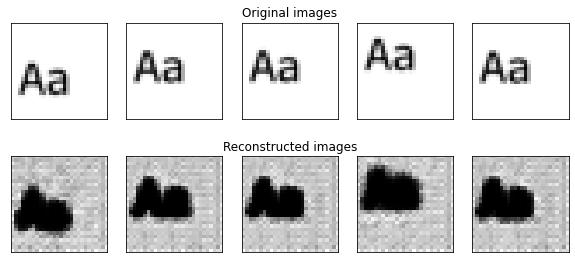

	 partial train loss (single batch): 26020.041016
	 partial train loss (single batch): 23226.693359
	 partial train loss (single batch): 24360.123047
	 partial train loss (single batch): 24183.427734
	 partial train loss (single batch): 32075.507812
	 partial train loss (single batch): 25715.775391
	 partial train loss (single batch): 25334.769531
	 partial train loss (single batch): 25890.736328
	 partial train loss (single batch): 25509.740234
	 partial train loss (single batch): 29685.259766
	 partial train loss (single batch): 19096.826172
	 partial train loss (single batch): 26338.523438
	 partial train loss (single batch): 25877.212891
	 partial train loss (single batch): 27599.777344
	 partial train loss (single batch): 24735.308594
	 partial train loss (single batch): 22261.724609
	 partial train loss (single batch): 22734.828125
	 partial train loss (single batch): 24374.304688
	 partial train loss (single batch): 23034.755859
	 partial train loss (single batch): 24242.900391


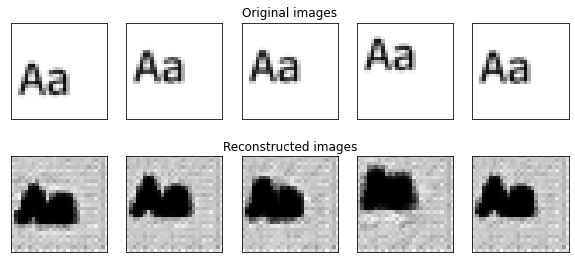

	 partial train loss (single batch): 26033.535156
	 partial train loss (single batch): 23238.152344
	 partial train loss (single batch): 24364.822266
	 partial train loss (single batch): 24172.572266
	 partial train loss (single batch): 32089.419922
	 partial train loss (single batch): 25703.412109
	 partial train loss (single batch): 25345.847656
	 partial train loss (single batch): 25912.027344
	 partial train loss (single batch): 25531.578125
	 partial train loss (single batch): 29699.919922
	 partial train loss (single batch): 19119.453125
	 partial train loss (single batch): 26321.416016
	 partial train loss (single batch): 25874.367188
	 partial train loss (single batch): 27620.179688
	 partial train loss (single batch): 24736.708984
	 partial train loss (single batch): 22282.898438
	 partial train loss (single batch): 22729.347656
	 partial train loss (single batch): 24390.619141
	 partial train loss (single batch): 23045.919922
	 partial train loss (single batch): 24286.060547


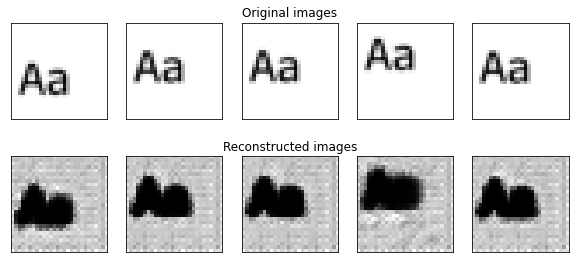

	 partial train loss (single batch): 26012.085938
	 partial train loss (single batch): 23234.218750
	 partial train loss (single batch): 24382.912109
	 partial train loss (single batch): 24187.275391
	 partial train loss (single batch): 32055.925781
	 partial train loss (single batch): 25697.716797
	 partial train loss (single batch): 25328.625000
	 partial train loss (single batch): 25882.199219
	 partial train loss (single batch): 25520.888672
	 partial train loss (single batch): 29681.312500
	 partial train loss (single batch): 19103.033203
	 partial train loss (single batch): 26327.916016
	 partial train loss (single batch): 25880.615234
	 partial train loss (single batch): 27615.724609
	 partial train loss (single batch): 24724.736328
	 partial train loss (single batch): 22276.144531
	 partial train loss (single batch): 22728.033203
	 partial train loss (single batch): 24379.925781
	 partial train loss (single batch): 23047.177734
	 partial train loss (single batch): 24243.544922


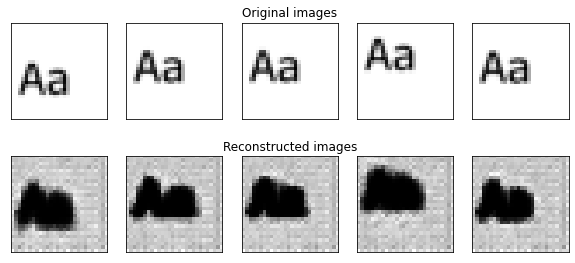

	 partial train loss (single batch): 26029.011719
	 partial train loss (single batch): 23223.871094
	 partial train loss (single batch): 24362.494141
	 partial train loss (single batch): 24165.125000
	 partial train loss (single batch): 32054.966797
	 partial train loss (single batch): 25726.064453
	 partial train loss (single batch): 25310.091797
	 partial train loss (single batch): 25898.849609
	 partial train loss (single batch): 25511.765625
	 partial train loss (single batch): 29693.687500
	 partial train loss (single batch): 19098.402344
	 partial train loss (single batch): 26313.593750
	 partial train loss (single batch): 25896.158203
	 partial train loss (single batch): 27607.205078
	 partial train loss (single batch): 24749.916016
	 partial train loss (single batch): 22249.175781
	 partial train loss (single batch): 22740.087891
	 partial train loss (single batch): 24375.375000
	 partial train loss (single batch): 23036.333984
	 partial train loss (single batch): 24245.195312


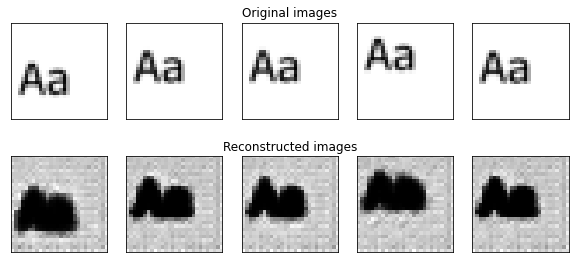

	 partial train loss (single batch): 26034.531250
	 partial train loss (single batch): 23245.382812
	 partial train loss (single batch): 24372.494141
	 partial train loss (single batch): 24190.488281
	 partial train loss (single batch): 32050.208984
	 partial train loss (single batch): 25688.744141
	 partial train loss (single batch): 25329.029297
	 partial train loss (single batch): 25881.705078
	 partial train loss (single batch): 25554.929688
	 partial train loss (single batch): 29690.789062
	 partial train loss (single batch): 19087.771484
	 partial train loss (single batch): 26319.037109
	 partial train loss (single batch): 25888.789062
	 partial train loss (single batch): 27614.851562
	 partial train loss (single batch): 24718.507812
	 partial train loss (single batch): 22262.677734
	 partial train loss (single batch): 22725.804688
	 partial train loss (single batch): 24379.771484
	 partial train loss (single batch): 23055.503906
	 partial train loss (single batch): 24245.136719


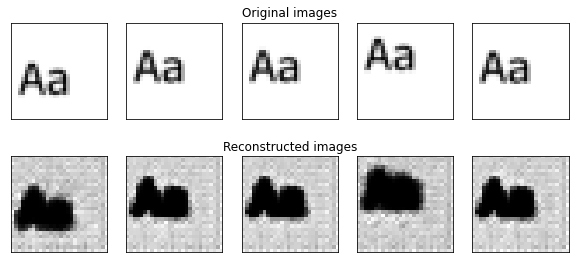

	 partial train loss (single batch): 26002.828125
	 partial train loss (single batch): 23233.093750
	 partial train loss (single batch): 24370.427734
	 partial train loss (single batch): 24170.953125
	 partial train loss (single batch): 32050.398438
	 partial train loss (single batch): 25703.294922
	 partial train loss (single batch): 25318.019531
	 partial train loss (single batch): 25880.566406
	 partial train loss (single batch): 25514.242188
	 partial train loss (single batch): 29676.074219
	 partial train loss (single batch): 19079.625000
	 partial train loss (single batch): 26315.728516
	 partial train loss (single batch): 25867.242188
	 partial train loss (single batch): 27595.671875
	 partial train loss (single batch): 24722.548828
	 partial train loss (single batch): 22265.548828
	 partial train loss (single batch): 22728.804688
	 partial train loss (single batch): 24379.195312
	 partial train loss (single batch): 23025.720703
	 partial train loss (single batch): 24238.755859


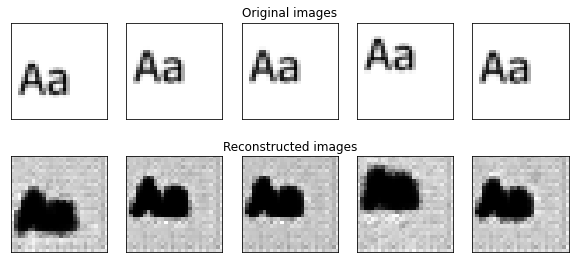

	 partial train loss (single batch): 26002.062500
	 partial train loss (single batch): 23225.621094
	 partial train loss (single batch): 24363.181641
	 partial train loss (single batch): 24163.775391
	 partial train loss (single batch): 32081.400391
	 partial train loss (single batch): 25683.480469
	 partial train loss (single batch): 25325.962891
	 partial train loss (single batch): 25872.595703
	 partial train loss (single batch): 25497.802734
	 partial train loss (single batch): 29664.388672
	 partial train loss (single batch): 19090.054688
	 partial train loss (single batch): 26325.164062
	 partial train loss (single batch): 25866.691406
	 partial train loss (single batch): 27599.404297
	 partial train loss (single batch): 24698.437500
	 partial train loss (single batch): 22244.736328
	 partial train loss (single batch): 22721.097656
	 partial train loss (single batch): 24405.224609
	 partial train loss (single batch): 23020.255859
	 partial train loss (single batch): 24239.900391


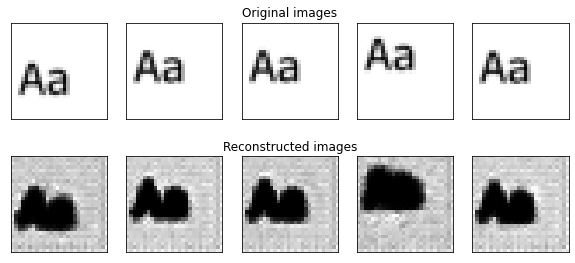

	 partial train loss (single batch): 26022.835938
	 partial train loss (single batch): 23215.630859
	 partial train loss (single batch): 24364.958984
	 partial train loss (single batch): 24138.871094
	 partial train loss (single batch): 32028.300781
	 partial train loss (single batch): 25681.312500
	 partial train loss (single batch): 25312.820312
	 partial train loss (single batch): 25867.589844
	 partial train loss (single batch): 25495.751953
	 partial train loss (single batch): 29685.031250
	 partial train loss (single batch): 19087.857422
	 partial train loss (single batch): 26307.722656
	 partial train loss (single batch): 25860.396484
	 partial train loss (single batch): 27593.585938
	 partial train loss (single batch): 24701.914062
	 partial train loss (single batch): 22238.894531
	 partial train loss (single batch): 22721.294922
	 partial train loss (single batch): 24371.453125
	 partial train loss (single batch): 23012.943359
	 partial train loss (single batch): 24247.281250


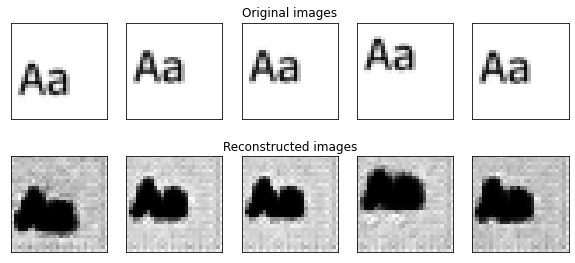

	 partial train loss (single batch): 25987.798828
	 partial train loss (single batch): 23213.339844
	 partial train loss (single batch): 24351.322266
	 partial train loss (single batch): 24171.207031
	 partial train loss (single batch): 32037.591797
	 partial train loss (single batch): 25687.236328
	 partial train loss (single batch): 25331.060547
	 partial train loss (single batch): 25864.181641
	 partial train loss (single batch): 25523.472656
	 partial train loss (single batch): 29660.376953
	 partial train loss (single batch): 19087.925781
	 partial train loss (single batch): 26303.593750
	 partial train loss (single batch): 25862.531250
	 partial train loss (single batch): 27602.693359
	 partial train loss (single batch): 24712.294922
	 partial train loss (single batch): 22264.333984
	 partial train loss (single batch): 22740.035156
	 partial train loss (single batch): 24384.503906
	 partial train loss (single batch): 23031.623047
	 partial train loss (single batch): 24231.904297


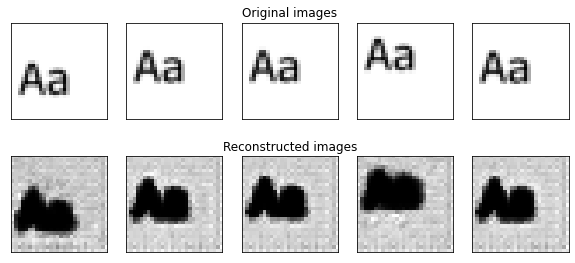

	 partial train loss (single batch): 26029.207031
	 partial train loss (single batch): 23242.330078
	 partial train loss (single batch): 24360.640625
	 partial train loss (single batch): 24177.167969
	 partial train loss (single batch): 32044.021484
	 partial train loss (single batch): 25691.224609
	 partial train loss (single batch): 25320.234375
	 partial train loss (single batch): 25868.888672
	 partial train loss (single batch): 25504.000000
	 partial train loss (single batch): 29671.443359
	 partial train loss (single batch): 19120.437500
	 partial train loss (single batch): 26300.394531
	 partial train loss (single batch): 25864.800781
	 partial train loss (single batch): 27619.912109
	 partial train loss (single batch): 24706.675781
	 partial train loss (single batch): 22248.142578
	 partial train loss (single batch): 22733.193359
	 partial train loss (single batch): 24395.009766
	 partial train loss (single batch): 23036.675781
	 partial train loss (single batch): 24241.296875


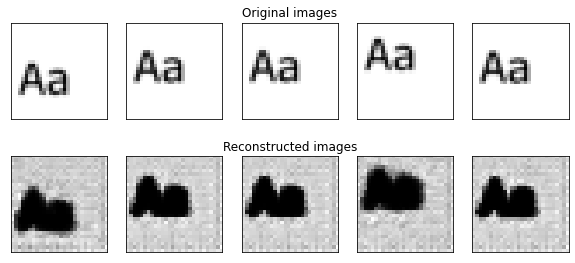

	 partial train loss (single batch): 26014.820312
	 partial train loss (single batch): 23224.775391
	 partial train loss (single batch): 24355.574219
	 partial train loss (single batch): 24157.949219
	 partial train loss (single batch): 32042.541016
	 partial train loss (single batch): 25682.089844
	 partial train loss (single batch): 25300.710938
	 partial train loss (single batch): 25867.015625
	 partial train loss (single batch): 25497.240234
	 partial train loss (single batch): 29673.156250
	 partial train loss (single batch): 19108.316406
	 partial train loss (single batch): 26319.562500
	 partial train loss (single batch): 25844.972656
	 partial train loss (single batch): 27578.324219
	 partial train loss (single batch): 24705.009766
	 partial train loss (single batch): 22248.203125
	 partial train loss (single batch): 22722.492188
	 partial train loss (single batch): 24364.976562
	 partial train loss (single batch): 23016.240234
	 partial train loss (single batch): 24243.308594


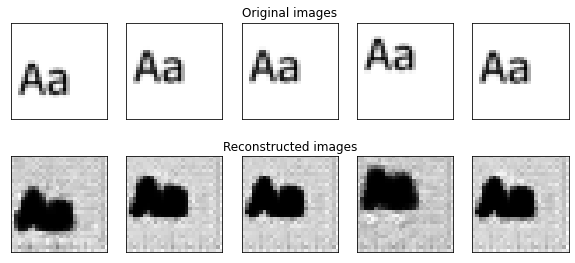

	 partial train loss (single batch): 25983.173828
	 partial train loss (single batch): 23224.078125
	 partial train loss (single batch): 24356.855469
	 partial train loss (single batch): 24166.789062
	 partial train loss (single batch): 32028.324219
	 partial train loss (single batch): 25670.541016
	 partial train loss (single batch): 25316.562500
	 partial train loss (single batch): 25860.955078
	 partial train loss (single batch): 25499.576172
	 partial train loss (single batch): 29675.125000
	 partial train loss (single batch): 19074.724609
	 partial train loss (single batch): 26288.634766
	 partial train loss (single batch): 25868.054688
	 partial train loss (single batch): 27572.953125
	 partial train loss (single batch): 24710.074219
	 partial train loss (single batch): 22244.837891
	 partial train loss (single batch): 22717.339844
	 partial train loss (single batch): 24370.525391
	 partial train loss (single batch): 23013.423828
	 partial train loss (single batch): 24240.193359


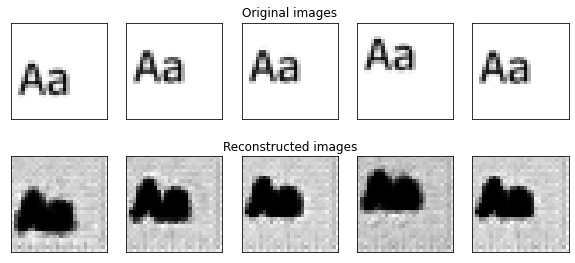

	 partial train loss (single batch): 26018.183594
	 partial train loss (single batch): 23205.417969
	 partial train loss (single batch): 24351.919922
	 partial train loss (single batch): 24160.519531
	 partial train loss (single batch): 32034.746094
	 partial train loss (single batch): 25666.244141
	 partial train loss (single batch): 25305.177734
	 partial train loss (single batch): 25871.855469
	 partial train loss (single batch): 25482.259766
	 partial train loss (single batch): 29668.236328
	 partial train loss (single batch): 19083.251953
	 partial train loss (single batch): 26325.818359
	 partial train loss (single batch): 25873.496094
	 partial train loss (single batch): 27597.792969
	 partial train loss (single batch): 24690.703125
	 partial train loss (single batch): 22269.054688
	 partial train loss (single batch): 22714.832031
	 partial train loss (single batch): 24374.199219
	 partial train loss (single batch): 23026.640625
	 partial train loss (single batch): 24237.509766


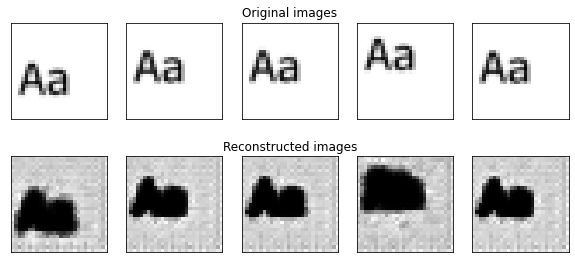

	 partial train loss (single batch): 26001.830078
	 partial train loss (single batch): 23203.230469
	 partial train loss (single batch): 24344.335938
	 partial train loss (single batch): 24153.509766
	 partial train loss (single batch): 32038.947266
	 partial train loss (single batch): 25697.736328
	 partial train loss (single batch): 25307.697266
	 partial train loss (single batch): 25860.960938
	 partial train loss (single batch): 25531.896484
	 partial train loss (single batch): 29674.849609
	 partial train loss (single batch): 19080.753906
	 partial train loss (single batch): 26290.947266
	 partial train loss (single batch): 25857.748047
	 partial train loss (single batch): 27578.056641
	 partial train loss (single batch): 24681.621094
	 partial train loss (single batch): 22247.125000
	 partial train loss (single batch): 22745.175781
	 partial train loss (single batch): 24388.041016
	 partial train loss (single batch): 23026.419922
	 partial train loss (single batch): 24228.980469


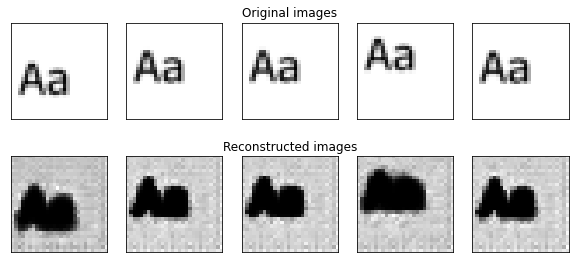

	 partial train loss (single batch): 25979.439453
	 partial train loss (single batch): 23189.878906
	 partial train loss (single batch): 24353.078125
	 partial train loss (single batch): 24141.916016
	 partial train loss (single batch): 32027.197266
	 partial train loss (single batch): 25673.214844
	 partial train loss (single batch): 25293.921875
	 partial train loss (single batch): 25865.285156
	 partial train loss (single batch): 25494.880859
	 partial train loss (single batch): 29667.259766
	 partial train loss (single batch): 19065.587891
	 partial train loss (single batch): 26307.917969
	 partial train loss (single batch): 25852.037109
	 partial train loss (single batch): 27573.664062
	 partial train loss (single batch): 24692.650391
	 partial train loss (single batch): 22249.621094
	 partial train loss (single batch): 22724.376953
	 partial train loss (single batch): 24379.472656
	 partial train loss (single batch): 23016.625000
	 partial train loss (single batch): 24217.224609


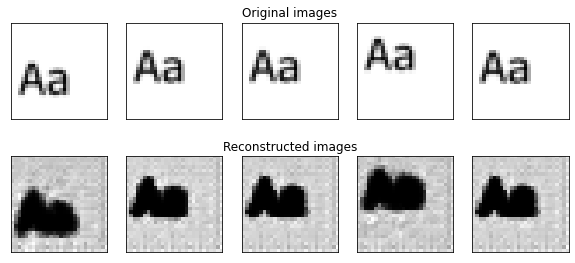

	 partial train loss (single batch): 25991.015625
	 partial train loss (single batch): 23207.886719
	 partial train loss (single batch): 24329.187500
	 partial train loss (single batch): 24163.402344
	 partial train loss (single batch): 32068.968750
	 partial train loss (single batch): 25663.406250
	 partial train loss (single batch): 25304.433594
	 partial train loss (single batch): 25874.099609
	 partial train loss (single batch): 25529.550781
	 partial train loss (single batch): 29671.369141
	 partial train loss (single batch): 19067.335938
	 partial train loss (single batch): 26304.525391
	 partial train loss (single batch): 25864.417969
	 partial train loss (single batch): 27581.359375
	 partial train loss (single batch): 24689.156250
	 partial train loss (single batch): 22245.025391
	 partial train loss (single batch): 22719.974609
	 partial train loss (single batch): 24371.519531
	 partial train loss (single batch): 23014.714844
	 partial train loss (single batch): 24209.521484


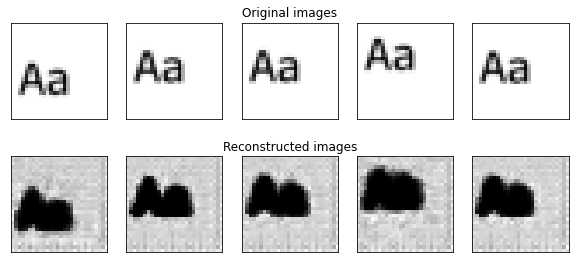

	 partial train loss (single batch): 25981.412109
	 partial train loss (single batch): 23204.638672
	 partial train loss (single batch): 24347.935547
	 partial train loss (single batch): 24154.113281
	 partial train loss (single batch): 32009.720703
	 partial train loss (single batch): 25683.675781
	 partial train loss (single batch): 25318.466797
	 partial train loss (single batch): 25858.882812
	 partial train loss (single batch): 25484.794922
	 partial train loss (single batch): 29666.380859
	 partial train loss (single batch): 19102.906250
	 partial train loss (single batch): 26305.736328
	 partial train loss (single batch): 25853.046875
	 partial train loss (single batch): 27585.861328
	 partial train loss (single batch): 24706.849609
	 partial train loss (single batch): 22227.427734
	 partial train loss (single batch): 22715.400391
	 partial train loss (single batch): 24366.082031
	 partial train loss (single batch): 23002.730469
	 partial train loss (single batch): 24227.742188


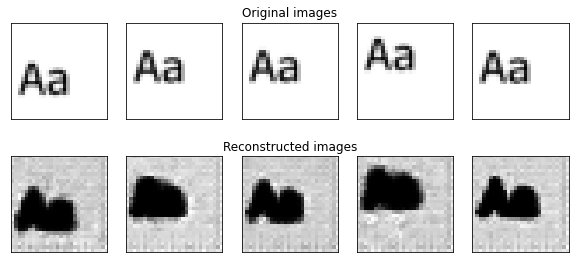

	 partial train loss (single batch): 25966.183594
	 partial train loss (single batch): 23199.240234
	 partial train loss (single batch): 24330.187500
	 partial train loss (single batch): 24145.070312
	 partial train loss (single batch): 32027.107422
	 partial train loss (single batch): 25662.638672
	 partial train loss (single batch): 25298.791016
	 partial train loss (single batch): 25863.537109
	 partial train loss (single batch): 25485.689453
	 partial train loss (single batch): 29679.412109
	 partial train loss (single batch): 19078.927734
	 partial train loss (single batch): 26288.330078
	 partial train loss (single batch): 25842.351562
	 partial train loss (single batch): 27599.261719
	 partial train loss (single batch): 24675.167969
	 partial train loss (single batch): 22228.574219
	 partial train loss (single batch): 22713.570312
	 partial train loss (single batch): 24351.324219
	 partial train loss (single batch): 23024.480469
	 partial train loss (single batch): 24230.208984


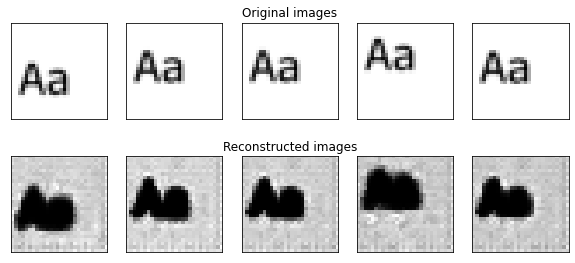

	 partial train loss (single batch): 25983.287109
	 partial train loss (single batch): 23199.830078
	 partial train loss (single batch): 24340.783203
	 partial train loss (single batch): 24140.878906
	 partial train loss (single batch): 32033.693359
	 partial train loss (single batch): 25659.337891
	 partial train loss (single batch): 25299.160156
	 partial train loss (single batch): 25842.353516
	 partial train loss (single batch): 25483.435547
	 partial train loss (single batch): 29661.232422
	 partial train loss (single batch): 19073.964844
	 partial train loss (single batch): 26298.339844
	 partial train loss (single batch): 25833.765625
	 partial train loss (single batch): 27570.406250
	 partial train loss (single batch): 24695.111328
	 partial train loss (single batch): 22225.544922
	 partial train loss (single batch): 22706.048828
	 partial train loss (single batch): 24335.021484
	 partial train loss (single batch): 23013.455078
	 partial train loss (single batch): 24203.207031


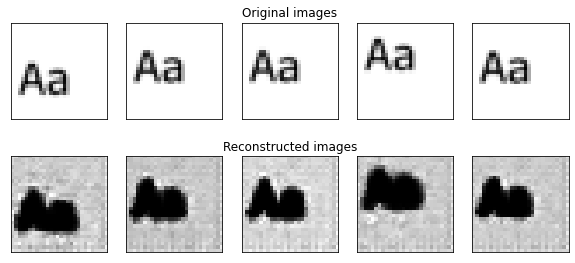

	 partial train loss (single batch): 25989.023438
	 partial train loss (single batch): 23203.195312
	 partial train loss (single batch): 24349.410156
	 partial train loss (single batch): 24139.707031
	 partial train loss (single batch): 32020.318359
	 partial train loss (single batch): 25660.763672
	 partial train loss (single batch): 25292.654297
	 partial train loss (single batch): 25866.291016
	 partial train loss (single batch): 25495.757812
	 partial train loss (single batch): 29647.982422
	 partial train loss (single batch): 19082.828125
	 partial train loss (single batch): 26314.730469
	 partial train loss (single batch): 25853.851562
	 partial train loss (single batch): 27574.607422
	 partial train loss (single batch): 24679.851562
	 partial train loss (single batch): 22235.234375
	 partial train loss (single batch): 22708.906250
	 partial train loss (single batch): 24350.650391
	 partial train loss (single batch): 23006.843750
	 partial train loss (single batch): 24215.677734


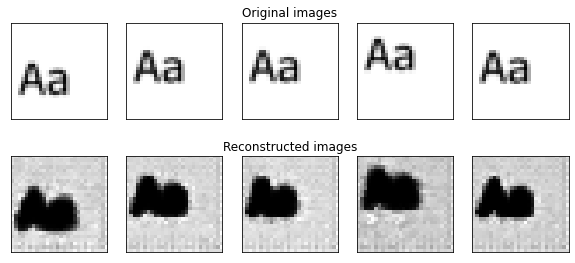

	 partial train loss (single batch): 25975.662109
	 partial train loss (single batch): 23209.953125
	 partial train loss (single batch): 24343.435547
	 partial train loss (single batch): 24155.298828
	 partial train loss (single batch): 32068.261719
	 partial train loss (single batch): 25668.816406
	 partial train loss (single batch): 25300.253906
	 partial train loss (single batch): 25865.695312
	 partial train loss (single batch): 25474.121094
	 partial train loss (single batch): 29657.525391
	 partial train loss (single batch): 19086.089844
	 partial train loss (single batch): 26306.816406
	 partial train loss (single batch): 25858.160156
	 partial train loss (single batch): 27598.619141
	 partial train loss (single batch): 24683.560547
	 partial train loss (single batch): 22224.392578
	 partial train loss (single batch): 22708.111328
	 partial train loss (single batch): 24366.755859
	 partial train loss (single batch): 23017.134766
	 partial train loss (single batch): 24215.003906


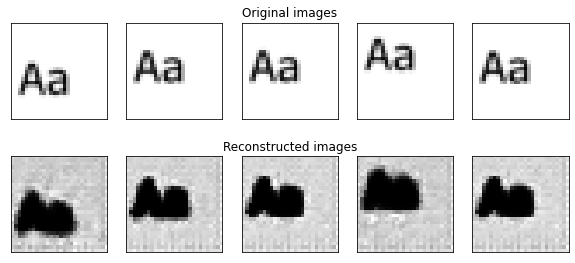

	 partial train loss (single batch): 25981.716797
	 partial train loss (single batch): 23206.388672
	 partial train loss (single batch): 24331.113281
	 partial train loss (single batch): 24146.652344
	 partial train loss (single batch): 32008.111328
	 partial train loss (single batch): 25664.707031
	 partial train loss (single batch): 25300.861328
	 partial train loss (single batch): 25876.724609
	 partial train loss (single batch): 25480.267578
	 partial train loss (single batch): 29698.179688
	 partial train loss (single batch): 19074.566406
	 partial train loss (single batch): 26288.099609
	 partial train loss (single batch): 25839.765625
	 partial train loss (single batch): 27572.642578
	 partial train loss (single batch): 24681.255859
	 partial train loss (single batch): 22227.564453
	 partial train loss (single batch): 22713.878906
	 partial train loss (single batch): 24376.703125
	 partial train loss (single batch): 23017.101562
	 partial train loss (single batch): 24209.011719


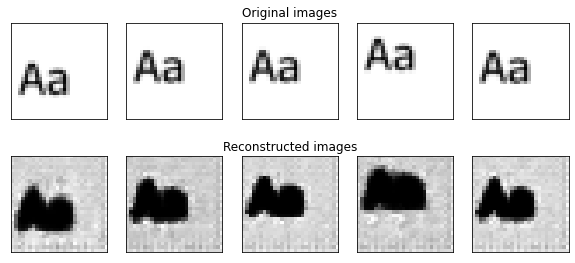

	 partial train loss (single batch): 25984.396484
	 partial train loss (single batch): 23195.875000
	 partial train loss (single batch): 24343.316406
	 partial train loss (single batch): 24154.996094
	 partial train loss (single batch): 32002.609375
	 partial train loss (single batch): 25664.291016
	 partial train loss (single batch): 25298.826172
	 partial train loss (single batch): 25852.351562
	 partial train loss (single batch): 25493.421875
	 partial train loss (single batch): 29656.599609
	 partial train loss (single batch): 19062.873047
	 partial train loss (single batch): 26277.505859
	 partial train loss (single batch): 25872.277344
	 partial train loss (single batch): 27605.710938
	 partial train loss (single batch): 24685.507812
	 partial train loss (single batch): 22229.623047
	 partial train loss (single batch): 22705.185547
	 partial train loss (single batch): 24353.484375
	 partial train loss (single batch): 23000.806641
	 partial train loss (single batch): 24213.345703


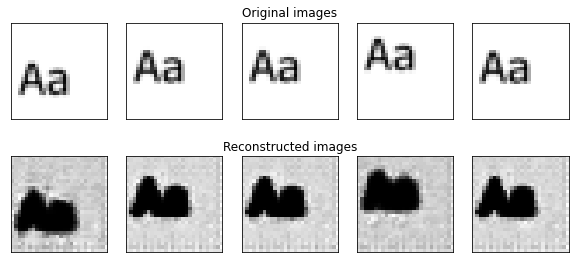

	 partial train loss (single batch): 25974.558594
	 partial train loss (single batch): 23197.357422
	 partial train loss (single batch): 24324.988281
	 partial train loss (single batch): 24130.921875
	 partial train loss (single batch): 32021.169922
	 partial train loss (single batch): 25655.941406
	 partial train loss (single batch): 25300.767578
	 partial train loss (single batch): 25845.130859
	 partial train loss (single batch): 25498.146484
	 partial train loss (single batch): 29683.160156
	 partial train loss (single batch): 19105.871094
	 partial train loss (single batch): 26296.810547
	 partial train loss (single batch): 25855.031250
	 partial train loss (single batch): 27586.828125
	 partial train loss (single batch): 24702.507812
	 partial train loss (single batch): 22245.203125
	 partial train loss (single batch): 22711.080078
	 partial train loss (single batch): 24359.248047
	 partial train loss (single batch): 23012.953125
	 partial train loss (single batch): 24231.484375


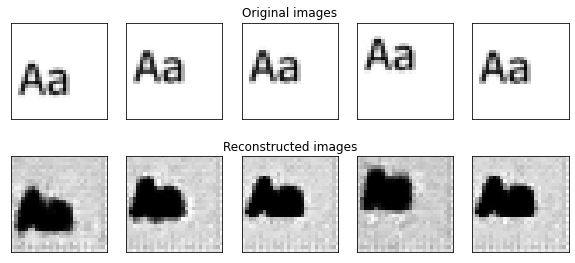

	 partial train loss (single batch): 25981.630859
	 partial train loss (single batch): 23197.642578
	 partial train loss (single batch): 24348.636719
	 partial train loss (single batch): 24128.316406
	 partial train loss (single batch): 32005.369141
	 partial train loss (single batch): 25649.011719
	 partial train loss (single batch): 25291.101562
	 partial train loss (single batch): 25862.333984
	 partial train loss (single batch): 25492.517578
	 partial train loss (single batch): 29646.554688
	 partial train loss (single batch): 19077.970703
	 partial train loss (single batch): 26292.669922
	 partial train loss (single batch): 25854.279297
	 partial train loss (single batch): 27598.763672
	 partial train loss (single batch): 24681.523438
	 partial train loss (single batch): 22231.285156
	 partial train loss (single batch): 22702.755859
	 partial train loss (single batch): 24358.980469
	 partial train loss (single batch): 22998.630859
	 partial train loss (single batch): 24213.021484


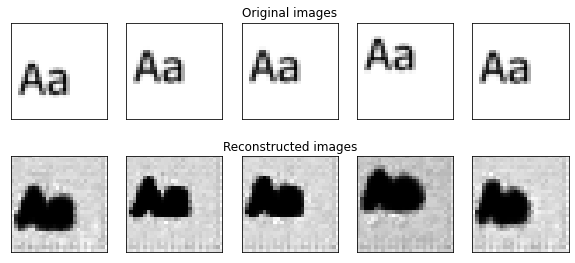

	 partial train loss (single batch): 25969.925781
	 partial train loss (single batch): 23195.484375
	 partial train loss (single batch): 24338.755859
	 partial train loss (single batch): 24119.074219
	 partial train loss (single batch): 32003.804688
	 partial train loss (single batch): 25647.605469
	 partial train loss (single batch): 25282.519531
	 partial train loss (single batch): 25856.136719
	 partial train loss (single batch): 25493.640625
	 partial train loss (single batch): 29678.109375
	 partial train loss (single batch): 19047.896484
	 partial train loss (single batch): 26286.369141
	 partial train loss (single batch): 25836.302734
	 partial train loss (single batch): 27579.080078
	 partial train loss (single batch): 24679.441406
	 partial train loss (single batch): 22229.472656
	 partial train loss (single batch): 22707.531250
	 partial train loss (single batch): 24341.886719
	 partial train loss (single batch): 23006.980469
	 partial train loss (single batch): 24198.927734


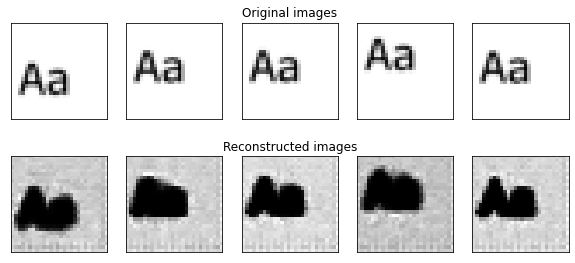

	 partial train loss (single batch): 25962.064453
	 partial train loss (single batch): 23202.560547
	 partial train loss (single batch): 24338.867188
	 partial train loss (single batch): 24133.468750
	 partial train loss (single batch): 32018.250000
	 partial train loss (single batch): 25640.425781
	 partial train loss (single batch): 25280.244141
	 partial train loss (single batch): 25851.433594
	 partial train loss (single batch): 25475.363281
	 partial train loss (single batch): 29660.521484
	 partial train loss (single batch): 19067.740234
	 partial train loss (single batch): 26315.404297
	 partial train loss (single batch): 25851.726562
	 partial train loss (single batch): 27591.035156
	 partial train loss (single batch): 24662.314453
	 partial train loss (single batch): 22215.703125
	 partial train loss (single batch): 22699.960938
	 partial train loss (single batch): 24369.300781
	 partial train loss (single batch): 22991.240234
	 partial train loss (single batch): 24212.269531


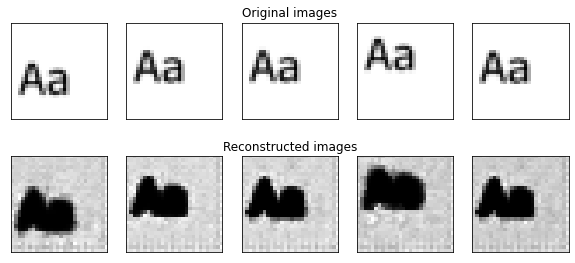

	 partial train loss (single batch): 25995.177734
	 partial train loss (single batch): 23194.007812
	 partial train loss (single batch): 24333.726562
	 partial train loss (single batch): 24128.982422
	 partial train loss (single batch): 32000.603516
	 partial train loss (single batch): 25665.875000
	 partial train loss (single batch): 25285.720703
	 partial train loss (single batch): 25840.050781
	 partial train loss (single batch): 25466.308594
	 partial train loss (single batch): 29659.220703
	 partial train loss (single batch): 19052.832031
	 partial train loss (single batch): 26278.148438
	 partial train loss (single batch): 25850.408203
	 partial train loss (single batch): 27589.472656
	 partial train loss (single batch): 24675.728516
	 partial train loss (single batch): 22220.062500
	 partial train loss (single batch): 22707.328125
	 partial train loss (single batch): 24346.583984
	 partial train loss (single batch): 22998.812500
	 partial train loss (single batch): 24196.412109


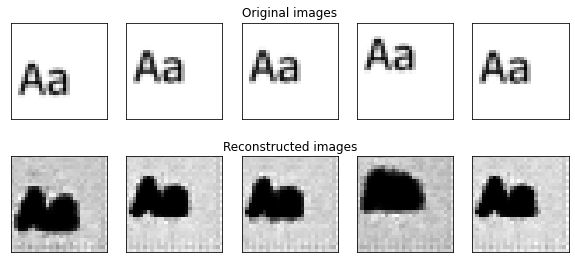

	 partial train loss (single batch): 25985.376953
	 partial train loss (single batch): 23216.441406
	 partial train loss (single batch): 24343.132812
	 partial train loss (single batch): 24137.488281
	 partial train loss (single batch): 32010.578125
	 partial train loss (single batch): 25673.460938
	 partial train loss (single batch): 25291.156250
	 partial train loss (single batch): 25869.974609
	 partial train loss (single batch): 25471.527344
	 partial train loss (single batch): 29650.937500
	 partial train loss (single batch): 19066.613281
	 partial train loss (single batch): 26283.568359
	 partial train loss (single batch): 25840.294922
	 partial train loss (single batch): 27566.955078
	 partial train loss (single batch): 24692.375000
	 partial train loss (single batch): 22242.919922
	 partial train loss (single batch): 22720.300781
	 partial train loss (single batch): 24359.996094
	 partial train loss (single batch): 23002.330078
	 partial train loss (single batch): 24200.341797


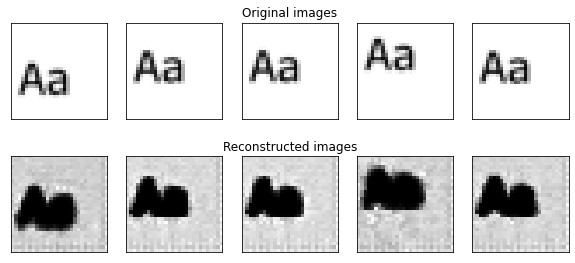

	 partial train loss (single batch): 25973.699219
	 partial train loss (single batch): 23192.660156
	 partial train loss (single batch): 24326.001953
	 partial train loss (single batch): 24118.277344
	 partial train loss (single batch): 32036.224609
	 partial train loss (single batch): 25652.275391
	 partial train loss (single batch): 25303.587891
	 partial train loss (single batch): 25861.482422
	 partial train loss (single batch): 25497.621094
	 partial train loss (single batch): 29665.955078
	 partial train loss (single batch): 19069.433594
	 partial train loss (single batch): 26299.117188
	 partial train loss (single batch): 25845.162109
	 partial train loss (single batch): 27581.599609
	 partial train loss (single batch): 24668.996094
	 partial train loss (single batch): 22216.841797
	 partial train loss (single batch): 22688.906250
	 partial train loss (single batch): 24346.904297
	 partial train loss (single batch): 22996.343750
	 partial train loss (single batch): 24231.927734


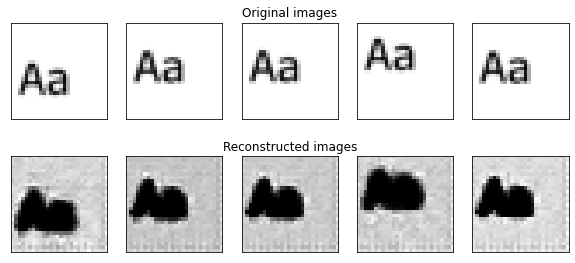

	 partial train loss (single batch): 25958.330078
	 partial train loss (single batch): 23179.703125
	 partial train loss (single batch): 24324.039062
	 partial train loss (single batch): 24137.855469
	 partial train loss (single batch): 32048.443359
	 partial train loss (single batch): 25637.378906
	 partial train loss (single batch): 25289.974609
	 partial train loss (single batch): 25845.697266
	 partial train loss (single batch): 25481.111328
	 partial train loss (single batch): 29654.335938
	 partial train loss (single batch): 19063.595703
	 partial train loss (single batch): 26276.058594
	 partial train loss (single batch): 25840.273438
	 partial train loss (single batch): 27579.080078
	 partial train loss (single batch): 24695.130859
	 partial train loss (single batch): 22216.695312
	 partial train loss (single batch): 22684.218750
	 partial train loss (single batch): 24341.082031
	 partial train loss (single batch): 22997.839844
	 partial train loss (single batch): 24203.673828


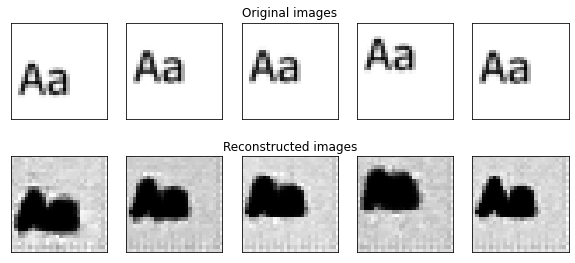

	 partial train loss (single batch): 25991.431641
	 partial train loss (single batch): 23184.679688
	 partial train loss (single batch): 24332.037109
	 partial train loss (single batch): 24131.621094
	 partial train loss (single batch): 32001.796875
	 partial train loss (single batch): 25649.175781
	 partial train loss (single batch): 25305.058594
	 partial train loss (single batch): 25851.923828
	 partial train loss (single batch): 25506.791016
	 partial train loss (single batch): 29638.654297
	 partial train loss (single batch): 19070.710938
	 partial train loss (single batch): 26280.609375
	 partial train loss (single batch): 25833.951172
	 partial train loss (single batch): 27568.966797
	 partial train loss (single batch): 24664.628906
	 partial train loss (single batch): 22214.990234
	 partial train loss (single batch): 22692.126953
	 partial train loss (single batch): 24370.089844
	 partial train loss (single batch): 22987.660156
	 partial train loss (single batch): 24212.228516


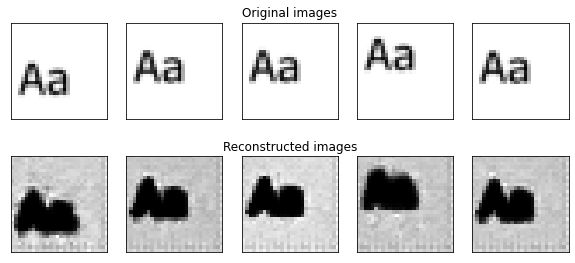

	 partial train loss (single batch): 25962.603516
	 partial train loss (single batch): 23222.234375
	 partial train loss (single batch): 24347.722656
	 partial train loss (single batch): 24141.582031
	 partial train loss (single batch): 32000.326172
	 partial train loss (single batch): 25653.126953
	 partial train loss (single batch): 25285.826172
	 partial train loss (single batch): 25843.546875
	 partial train loss (single batch): 25467.890625
	 partial train loss (single batch): 29632.480469
	 partial train loss (single batch): 19058.273438
	 partial train loss (single batch): 26281.361328
	 partial train loss (single batch): 25859.972656
	 partial train loss (single batch): 27584.759766
	 partial train loss (single batch): 24663.101562
	 partial train loss (single batch): 22227.314453
	 partial train loss (single batch): 22708.787109
	 partial train loss (single batch): 24375.216797
	 partial train loss (single batch): 23005.128906
	 partial train loss (single batch): 24229.199219


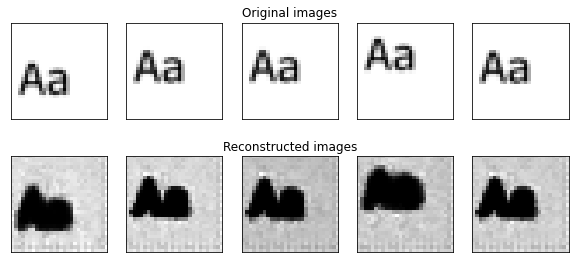

	 partial train loss (single batch): 25981.107422
	 partial train loss (single batch): 23182.630859
	 partial train loss (single batch): 24328.011719
	 partial train loss (single batch): 24114.136719
	 partial train loss (single batch): 32025.837891
	 partial train loss (single batch): 25642.125000
	 partial train loss (single batch): 25281.519531
	 partial train loss (single batch): 25836.388672
	 partial train loss (single batch): 25471.169922
	 partial train loss (single batch): 29659.298828
	 partial train loss (single batch): 19061.519531
	 partial train loss (single batch): 26297.828125
	 partial train loss (single batch): 25831.507812
	 partial train loss (single batch): 27544.205078
	 partial train loss (single batch): 24677.867188
	 partial train loss (single batch): 22239.525391
	 partial train loss (single batch): 22698.130859
	 partial train loss (single batch): 24354.968750
	 partial train loss (single batch): 22990.851562
	 partial train loss (single batch): 24205.599609


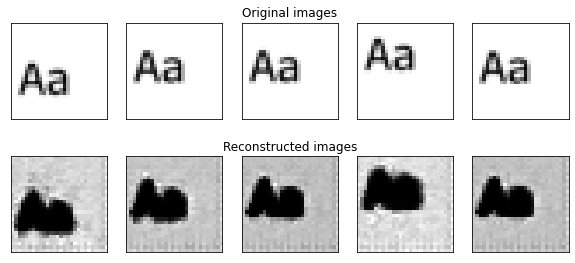

	 partial train loss (single batch): 25968.048828
	 partial train loss (single batch): 23185.380859
	 partial train loss (single batch): 24323.162109
	 partial train loss (single batch): 24116.003906
	 partial train loss (single batch): 32014.740234
	 partial train loss (single batch): 25654.816406
	 partial train loss (single batch): 25274.697266
	 partial train loss (single batch): 25841.710938
	 partial train loss (single batch): 25470.365234
	 partial train loss (single batch): 29656.548828
	 partial train loss (single batch): 19059.382812
	 partial train loss (single batch): 26308.945312
	 partial train loss (single batch): 25835.330078
	 partial train loss (single batch): 27552.376953
	 partial train loss (single batch): 24673.031250
	 partial train loss (single batch): 22228.664062
	 partial train loss (single batch): 22697.025391
	 partial train loss (single batch): 24347.935547
	 partial train loss (single batch): 23000.771484
	 partial train loss (single batch): 24207.757812


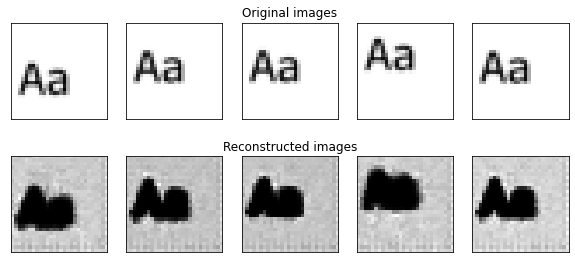

	 partial train loss (single batch): 25975.191406
	 partial train loss (single batch): 23184.085938
	 partial train loss (single batch): 24322.796875
	 partial train loss (single batch): 24123.687500
	 partial train loss (single batch): 31995.869141
	 partial train loss (single batch): 25658.849609
	 partial train loss (single batch): 25294.269531
	 partial train loss (single batch): 25829.439453
	 partial train loss (single batch): 25475.501953
	 partial train loss (single batch): 29645.148438
	 partial train loss (single batch): 19063.433594
	 partial train loss (single batch): 26279.058594
	 partial train loss (single batch): 25862.427734
	 partial train loss (single batch): 27565.351562
	 partial train loss (single batch): 24670.607422
	 partial train loss (single batch): 22206.173828
	 partial train loss (single batch): 22689.230469
	 partial train loss (single batch): 24343.792969
	 partial train loss (single batch): 22990.216797
	 partial train loss (single batch): 24211.587891


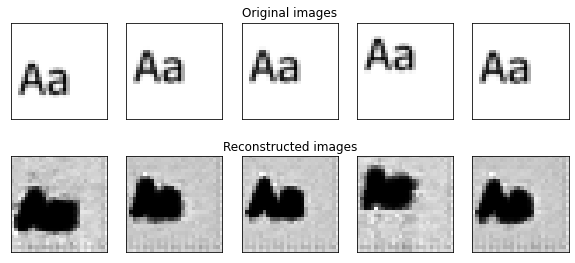

	 partial train loss (single batch): 25974.490234
	 partial train loss (single batch): 23199.619141
	 partial train loss (single batch): 24331.460938
	 partial train loss (single batch): 24124.888672
	 partial train loss (single batch): 32023.113281
	 partial train loss (single batch): 25653.679688
	 partial train loss (single batch): 25291.027344
	 partial train loss (single batch): 25841.341797
	 partial train loss (single batch): 25451.923828
	 partial train loss (single batch): 29662.054688
	 partial train loss (single batch): 19074.001953
	 partial train loss (single batch): 26278.283203
	 partial train loss (single batch): 25822.792969
	 partial train loss (single batch): 27596.638672
	 partial train loss (single batch): 24680.162109
	 partial train loss (single batch): 22228.613281
	 partial train loss (single batch): 22697.884766
	 partial train loss (single batch): 24359.197266
	 partial train loss (single batch): 22994.568359
	 partial train loss (single batch): 24201.500000


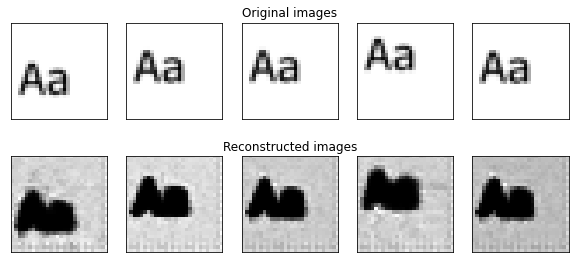

	 partial train loss (single batch): 26003.673828
	 partial train loss (single batch): 23187.513672
	 partial train loss (single batch): 24335.210938
	 partial train loss (single batch): 24130.931641
	 partial train loss (single batch): 31995.884766
	 partial train loss (single batch): 25644.908203
	 partial train loss (single batch): 25277.080078
	 partial train loss (single batch): 25826.513672
	 partial train loss (single batch): 25499.843750
	 partial train loss (single batch): 29648.683594
	 partial train loss (single batch): 19051.929688
	 partial train loss (single batch): 26273.841797
	 partial train loss (single batch): 25857.646484
	 partial train loss (single batch): 27541.507812
	 partial train loss (single batch): 24681.359375
	 partial train loss (single batch): 22203.328125
	 partial train loss (single batch): 22697.246094
	 partial train loss (single batch): 24340.253906
	 partial train loss (single batch): 22980.275391
	 partial train loss (single batch): 24207.861328


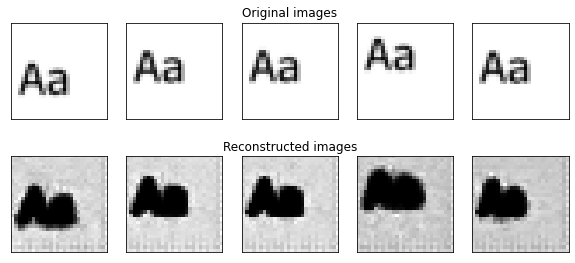

	 partial train loss (single batch): 25974.589844
	 partial train loss (single batch): 23174.302734
	 partial train loss (single batch): 24404.878906
	 partial train loss (single batch): 24109.591797
	 partial train loss (single batch): 32012.726562
	 partial train loss (single batch): 25653.431641
	 partial train loss (single batch): 25301.384766
	 partial train loss (single batch): 25856.283203
	 partial train loss (single batch): 25504.714844
	 partial train loss (single batch): 29670.312500
	 partial train loss (single batch): 19083.503906
	 partial train loss (single batch): 26299.501953
	 partial train loss (single batch): 25847.158203
	 partial train loss (single batch): 27584.533203
	 partial train loss (single batch): 24680.720703
	 partial train loss (single batch): 22232.947266
	 partial train loss (single batch): 22703.490234
	 partial train loss (single batch): 24333.554688
	 partial train loss (single batch): 22983.791016
	 partial train loss (single batch): 24202.357422


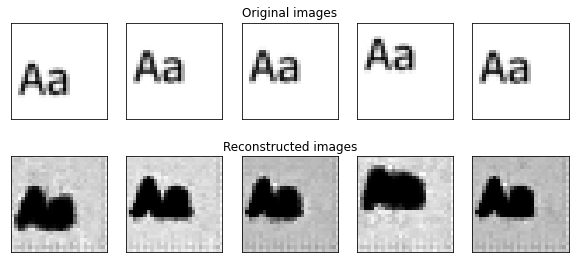

	 partial train loss (single batch): 25990.498047
	 partial train loss (single batch): 23187.839844
	 partial train loss (single batch): 24333.119141
	 partial train loss (single batch): 24121.501953
	 partial train loss (single batch): 32012.267578
	 partial train loss (single batch): 25648.298828
	 partial train loss (single batch): 25286.009766
	 partial train loss (single batch): 25841.611328
	 partial train loss (single batch): 25480.513672
	 partial train loss (single batch): 29648.445312
	 partial train loss (single batch): 19079.958984
	 partial train loss (single batch): 26286.496094
	 partial train loss (single batch): 25850.531250
	 partial train loss (single batch): 27552.763672
	 partial train loss (single batch): 24668.910156
	 partial train loss (single batch): 22216.613281
	 partial train loss (single batch): 22720.382812
	 partial train loss (single batch): 24356.023438
	 partial train loss (single batch): 23024.919922
	 partial train loss (single batch): 24204.980469


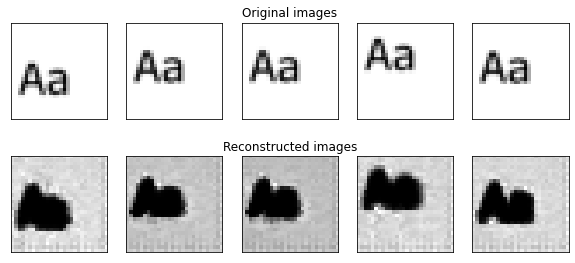

	 partial train loss (single batch): 25967.248047
	 partial train loss (single batch): 23178.330078
	 partial train loss (single batch): 24337.347656
	 partial train loss (single batch): 24110.039062
	 partial train loss (single batch): 31995.429688
	 partial train loss (single batch): 25649.187500
	 partial train loss (single batch): 25267.234375
	 partial train loss (single batch): 25856.664062
	 partial train loss (single batch): 25469.083984
	 partial train loss (single batch): 29637.101562
	 partial train loss (single batch): 19068.576172
	 partial train loss (single batch): 26271.671875
	 partial train loss (single batch): 25830.664062
	 partial train loss (single batch): 27569.238281
	 partial train loss (single batch): 24667.302734
	 partial train loss (single batch): 22216.683594
	 partial train loss (single batch): 22716.308594
	 partial train loss (single batch): 24338.650391
	 partial train loss (single batch): 22987.976562
	 partial train loss (single batch): 24201.228516


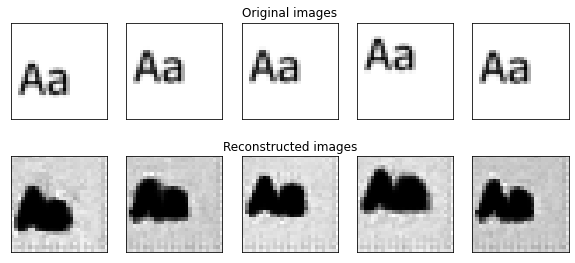

	 partial train loss (single batch): 25987.753906
	 partial train loss (single batch): 23192.179688
	 partial train loss (single batch): 24320.917969
	 partial train loss (single batch): 24141.128906
	 partial train loss (single batch): 32022.302734
	 partial train loss (single batch): 25630.728516
	 partial train loss (single batch): 25273.863281
	 partial train loss (single batch): 25835.974609
	 partial train loss (single batch): 25482.130859
	 partial train loss (single batch): 29653.988281
	 partial train loss (single batch): 19065.062500
	 partial train loss (single batch): 26282.294922
	 partial train loss (single batch): 25851.927734
	 partial train loss (single batch): 27540.859375
	 partial train loss (single batch): 24674.255859
	 partial train loss (single batch): 22218.382812
	 partial train loss (single batch): 22695.492188
	 partial train loss (single batch): 24369.630859
	 partial train loss (single batch): 22974.132812
	 partial train loss (single batch): 24227.722656


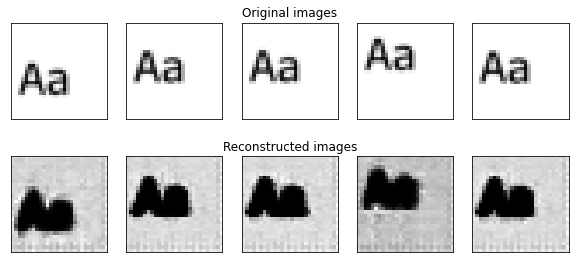

	 partial train loss (single batch): 25951.423828
	 partial train loss (single batch): 23177.748047
	 partial train loss (single batch): 24313.496094
	 partial train loss (single batch): 24122.228516
	 partial train loss (single batch): 32033.279297
	 partial train loss (single batch): 25638.833984
	 partial train loss (single batch): 25267.421875
	 partial train loss (single batch): 25831.640625
	 partial train loss (single batch): 25465.929688
	 partial train loss (single batch): 29646.730469
	 partial train loss (single batch): 19062.060547
	 partial train loss (single batch): 26280.314453
	 partial train loss (single batch): 25843.431641
	 partial train loss (single batch): 27574.132812
	 partial train loss (single batch): 24682.082031
	 partial train loss (single batch): 22212.255859
	 partial train loss (single batch): 22696.345703
	 partial train loss (single batch): 24338.775391
	 partial train loss (single batch): 22980.509766
	 partial train loss (single batch): 24190.494141


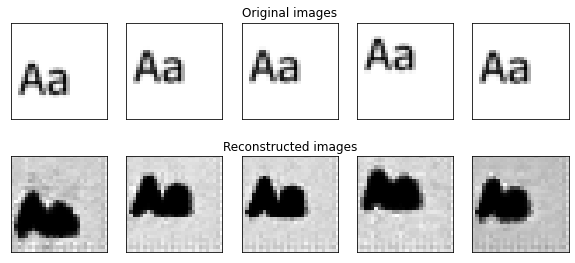

	 partial train loss (single batch): 25965.234375
	 partial train loss (single batch): 23193.265625
	 partial train loss (single batch): 24321.398438
	 partial train loss (single batch): 24119.882812
	 partial train loss (single batch): 31989.164062
	 partial train loss (single batch): 25636.910156
	 partial train loss (single batch): 25281.941406
	 partial train loss (single batch): 25839.130859
	 partial train loss (single batch): 25471.728516
	 partial train loss (single batch): 29642.195312
	 partial train loss (single batch): 19078.933594
	 partial train loss (single batch): 26272.371094
	 partial train loss (single batch): 25850.210938
	 partial train loss (single batch): 27568.773438
	 partial train loss (single batch): 24686.349609
	 partial train loss (single batch): 22221.289062
	 partial train loss (single batch): 22706.107422
	 partial train loss (single batch): 24361.224609
	 partial train loss (single batch): 22984.470703
	 partial train loss (single batch): 24217.970703


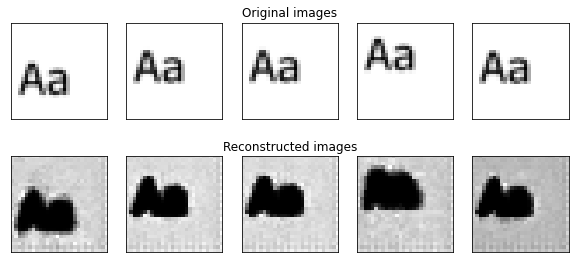

	 partial train loss (single batch): 25980.015625
	 partial train loss (single batch): 23178.839844
	 partial train loss (single batch): 24338.056641
	 partial train loss (single batch): 24112.517578
	 partial train loss (single batch): 32002.949219
	 partial train loss (single batch): 25647.183594
	 partial train loss (single batch): 25285.683594
	 partial train loss (single batch): 25840.875000
	 partial train loss (single batch): 25483.058594
	 partial train loss (single batch): 29673.707031
	 partial train loss (single batch): 19061.533203
	 partial train loss (single batch): 26278.453125
	 partial train loss (single batch): 25831.205078
	 partial train loss (single batch): 27555.708984
	 partial train loss (single batch): 24659.796875
	 partial train loss (single batch): 22221.242188
	 partial train loss (single batch): 22700.642578
	 partial train loss (single batch): 24350.595703
	 partial train loss (single batch): 22984.583984
	 partial train loss (single batch): 24193.443359


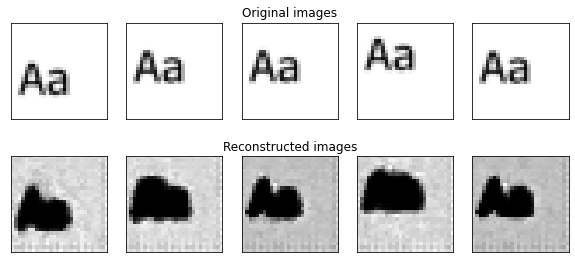

	 partial train loss (single batch): 25984.240234
	 partial train loss (single batch): 23199.355469
	 partial train loss (single batch): 24327.304688
	 partial train loss (single batch): 24131.751953
	 partial train loss (single batch): 32036.279297
	 partial train loss (single batch): 25640.773438
	 partial train loss (single batch): 25285.154297
	 partial train loss (single batch): 25849.279297
	 partial train loss (single batch): 25490.138672
	 partial train loss (single batch): 29652.890625
	 partial train loss (single batch): 19070.197266
	 partial train loss (single batch): 26284.560547
	 partial train loss (single batch): 25870.003906
	 partial train loss (single batch): 27572.552734
	 partial train loss (single batch): 24682.917969
	 partial train loss (single batch): 22216.402344
	 partial train loss (single batch): 22695.558594
	 partial train loss (single batch): 24360.021484
	 partial train loss (single batch): 22978.787109
	 partial train loss (single batch): 24202.578125


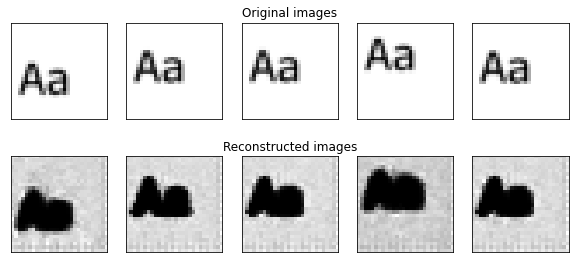

	 partial train loss (single batch): 25960.164062
	 partial train loss (single batch): 23171.060547
	 partial train loss (single batch): 24338.359375
	 partial train loss (single batch): 24118.300781
	 partial train loss (single batch): 32007.798828
	 partial train loss (single batch): 25653.076172
	 partial train loss (single batch): 25286.128906
	 partial train loss (single batch): 25829.849609
	 partial train loss (single batch): 25464.529297
	 partial train loss (single batch): 29643.558594
	 partial train loss (single batch): 19056.908203
	 partial train loss (single batch): 26290.218750
	 partial train loss (single batch): 25825.585938
	 partial train loss (single batch): 27551.955078
	 partial train loss (single batch): 24671.583984
	 partial train loss (single batch): 22216.572266
	 partial train loss (single batch): 22689.691406
	 partial train loss (single batch): 24337.873047
	 partial train loss (single batch): 23061.677734
	 partial train loss (single batch): 24196.083984


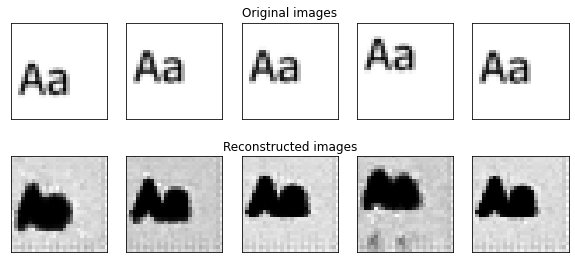

	 partial train loss (single batch): 25956.404297
	 partial train loss (single batch): 23172.242188
	 partial train loss (single batch): 24318.511719
	 partial train loss (single batch): 24158.238281
	 partial train loss (single batch): 32019.484375
	 partial train loss (single batch): 25642.396484
	 partial train loss (single batch): 25271.703125
	 partial train loss (single batch): 25835.869141
	 partial train loss (single batch): 25456.707031
	 partial train loss (single batch): 29666.839844
	 partial train loss (single batch): 19058.410156
	 partial train loss (single batch): 26280.123047
	 partial train loss (single batch): 25823.355469
	 partial train loss (single batch): 27548.525391
	 partial train loss (single batch): 24666.839844
	 partial train loss (single batch): 22209.843750
	 partial train loss (single batch): 22680.894531
	 partial train loss (single batch): 24348.265625
	 partial train loss (single batch): 22973.353516
	 partial train loss (single batch): 24201.990234


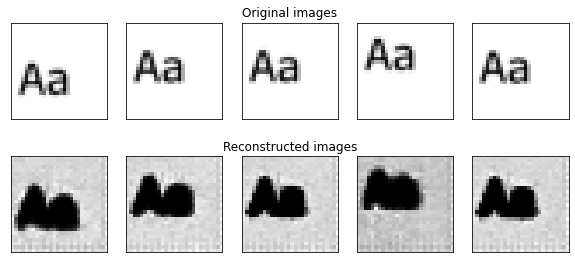

	 partial train loss (single batch): 25968.056641
	 partial train loss (single batch): 23188.863281
	 partial train loss (single batch): 24319.083984
	 partial train loss (single batch): 24113.771484
	 partial train loss (single batch): 31996.800781
	 partial train loss (single batch): 25640.791016
	 partial train loss (single batch): 25281.468750
	 partial train loss (single batch): 25851.271484
	 partial train loss (single batch): 25482.335938
	 partial train loss (single batch): 29643.164062
	 partial train loss (single batch): 19049.912109
	 partial train loss (single batch): 26276.515625
	 partial train loss (single batch): 25824.457031
	 partial train loss (single batch): 27563.417969
	 partial train loss (single batch): 24674.570312
	 partial train loss (single batch): 22199.660156
	 partial train loss (single batch): 22684.544922
	 partial train loss (single batch): 24340.056641
	 partial train loss (single batch): 22985.300781
	 partial train loss (single batch): 24204.373047


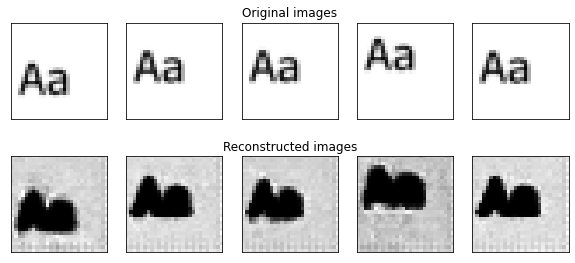

	 partial train loss (single batch): 25945.996094
	 partial train loss (single batch): 23181.337891
	 partial train loss (single batch): 24332.742188
	 partial train loss (single batch): 24128.060547
	 partial train loss (single batch): 31995.949219
	 partial train loss (single batch): 25626.367188
	 partial train loss (single batch): 25271.603516
	 partial train loss (single batch): 25880.566406
	 partial train loss (single batch): 25452.287109
	 partial train loss (single batch): 29641.300781
	 partial train loss (single batch): 19049.464844
	 partial train loss (single batch): 26271.423828
	 partial train loss (single batch): 25846.646484
	 partial train loss (single batch): 27538.191406
	 partial train loss (single batch): 24661.207031
	 partial train loss (single batch): 22202.869141
	 partial train loss (single batch): 22690.048828
	 partial train loss (single batch): 24367.210938
	 partial train loss (single batch): 23047.658203
	 partial train loss (single batch): 24201.216797


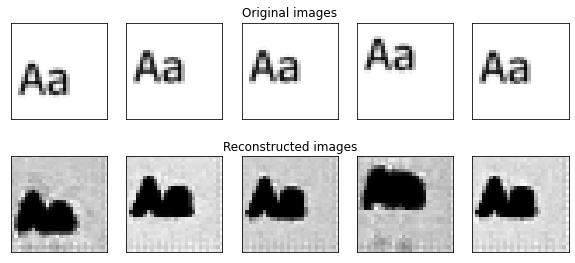

	 partial train loss (single batch): 25956.705078
	 partial train loss (single batch): 23178.927734
	 partial train loss (single batch): 24335.265625
	 partial train loss (single batch): 24128.097656
	 partial train loss (single batch): 31993.865234
	 partial train loss (single batch): 25634.863281
	 partial train loss (single batch): 25284.570312
	 partial train loss (single batch): 25853.947266
	 partial train loss (single batch): 25491.658203
	 partial train loss (single batch): 29629.296875
	 partial train loss (single batch): 19068.087891
	 partial train loss (single batch): 26261.593750
	 partial train loss (single batch): 25856.042969
	 partial train loss (single batch): 27560.189453
	 partial train loss (single batch): 24669.306641
	 partial train loss (single batch): 22225.128906
	 partial train loss (single batch): 22688.976562
	 partial train loss (single batch): 24328.828125
	 partial train loss (single batch): 23019.082031
	 partial train loss (single batch): 24184.425781


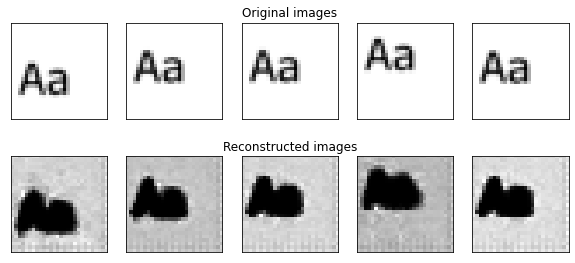

	 partial train loss (single batch): 25964.218750
	 partial train loss (single batch): 23181.207031
	 partial train loss (single batch): 24319.066406
	 partial train loss (single batch): 24110.636719
	 partial train loss (single batch): 31995.505859
	 partial train loss (single batch): 25639.031250
	 partial train loss (single batch): 25273.740234
	 partial train loss (single batch): 25832.580078
	 partial train loss (single batch): 25469.582031
	 partial train loss (single batch): 29622.509766
	 partial train loss (single batch): 19047.539062
	 partial train loss (single batch): 26269.888672
	 partial train loss (single batch): 25833.371094
	 partial train loss (single batch): 27549.589844
	 partial train loss (single batch): 24676.265625
	 partial train loss (single batch): 22203.560547
	 partial train loss (single batch): 22684.580078
	 partial train loss (single batch): 24345.410156
	 partial train loss (single batch): 23007.886719
	 partial train loss (single batch): 24198.763672


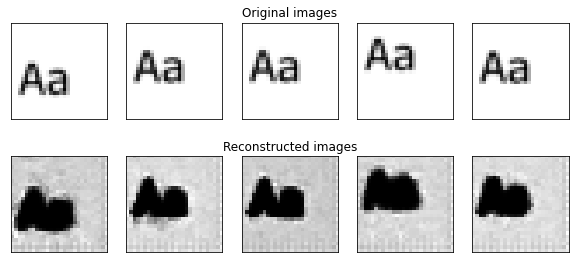

	 partial train loss (single batch): 25945.371094
	 partial train loss (single batch): 23185.966797
	 partial train loss (single batch): 24312.703125
	 partial train loss (single batch): 24112.541016
	 partial train loss (single batch): 31989.949219
	 partial train loss (single batch): 25627.291016
	 partial train loss (single batch): 25270.027344
	 partial train loss (single batch): 25837.468750
	 partial train loss (single batch): 25492.957031
	 partial train loss (single batch): 29638.925781
	 partial train loss (single batch): 19048.025391
	 partial train loss (single batch): 26280.669922
	 partial train loss (single batch): 25838.539062
	 partial train loss (single batch): 27549.755859
	 partial train loss (single batch): 24648.380859
	 partial train loss (single batch): 22207.781250
	 partial train loss (single batch): 22698.472656
	 partial train loss (single batch): 24334.439453
	 partial train loss (single batch): 22984.328125
	 partial train loss (single batch): 24219.855469


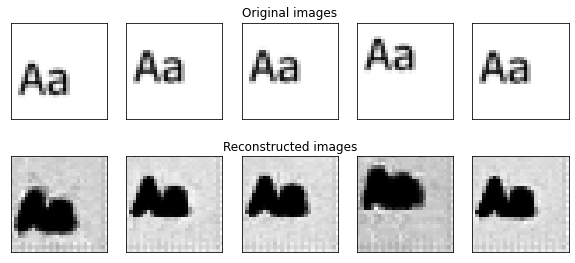

	 partial train loss (single batch): 25957.046875
	 partial train loss (single batch): 23168.046875
	 partial train loss (single batch): 24318.748047
	 partial train loss (single batch): 24098.074219
	 partial train loss (single batch): 32013.244141
	 partial train loss (single batch): 25626.121094
	 partial train loss (single batch): 25270.652344
	 partial train loss (single batch): 25817.460938
	 partial train loss (single batch): 25478.927734
	 partial train loss (single batch): 29628.097656
	 partial train loss (single batch): 19054.052734
	 partial train loss (single batch): 26268.457031
	 partial train loss (single batch): 25832.179688
	 partial train loss (single batch): 27566.693359
	 partial train loss (single batch): 24658.835938
	 partial train loss (single batch): 22196.904297
	 partial train loss (single batch): 22678.025391
	 partial train loss (single batch): 24322.515625
	 partial train loss (single batch): 22974.697266
	 partial train loss (single batch): 24199.953125


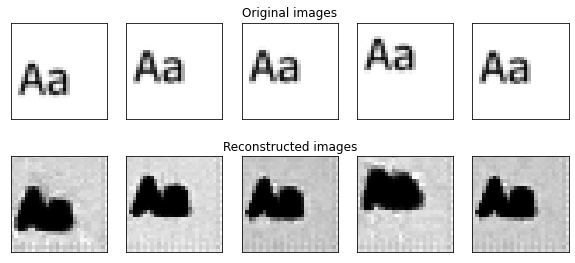

	 partial train loss (single batch): 25949.804688
	 partial train loss (single batch): 23165.851562
	 partial train loss (single batch): 24303.453125
	 partial train loss (single batch): 24119.324219
	 partial train loss (single batch): 31997.701172
	 partial train loss (single batch): 25639.716797
	 partial train loss (single batch): 25272.123047
	 partial train loss (single batch): 25828.447266
	 partial train loss (single batch): 25486.019531
	 partial train loss (single batch): 29625.808594
	 partial train loss (single batch): 19050.273438
	 partial train loss (single batch): 26293.919922
	 partial train loss (single batch): 25832.119141
	 partial train loss (single batch): 27557.357422
	 partial train loss (single batch): 24668.361328
	 partial train loss (single batch): 22213.335938
	 partial train loss (single batch): 22683.427734
	 partial train loss (single batch): 24321.568359
	 partial train loss (single batch): 22984.513672
	 partial train loss (single batch): 24203.984375


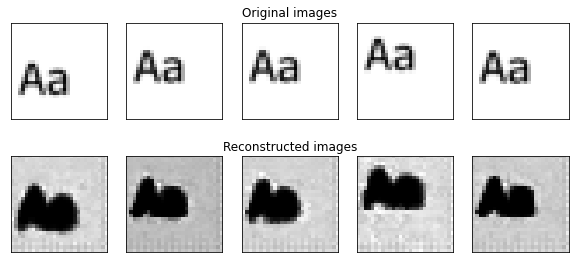

	 partial train loss (single batch): 25967.753906
	 partial train loss (single batch): 23166.636719
	 partial train loss (single batch): 24313.423828
	 partial train loss (single batch): 24116.878906
	 partial train loss (single batch): 31978.953125
	 partial train loss (single batch): 25615.951172
	 partial train loss (single batch): 25265.511719
	 partial train loss (single batch): 25820.943359
	 partial train loss (single batch): 25474.328125
	 partial train loss (single batch): 29631.800781
	 partial train loss (single batch): 19062.500000
	 partial train loss (single batch): 26256.621094
	 partial train loss (single batch): 25820.958984
	 partial train loss (single batch): 27556.732422
	 partial train loss (single batch): 24660.158203
	 partial train loss (single batch): 22200.693359
	 partial train loss (single batch): 22690.294922
	 partial train loss (single batch): 24329.199219
	 partial train loss (single batch): 22977.646484
	 partial train loss (single batch): 24210.748047


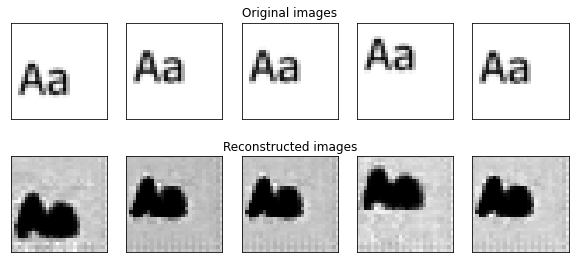

	 partial train loss (single batch): 25953.189453
	 partial train loss (single batch): 23175.833984
	 partial train loss (single batch): 24327.257812
	 partial train loss (single batch): 24114.667969
	 partial train loss (single batch): 32007.656250
	 partial train loss (single batch): 25641.673828
	 partial train loss (single batch): 25273.851562
	 partial train loss (single batch): 25821.195312
	 partial train loss (single batch): 25483.769531
	 partial train loss (single batch): 29646.392578
	 partial train loss (single batch): 19049.566406
	 partial train loss (single batch): 26263.001953
	 partial train loss (single batch): 25824.484375
	 partial train loss (single batch): 27538.384766
	 partial train loss (single batch): 24650.046875
	 partial train loss (single batch): 22223.017578
	 partial train loss (single batch): 22684.113281
	 partial train loss (single batch): 24330.472656
	 partial train loss (single batch): 22969.873047
	 partial train loss (single batch): 24188.671875


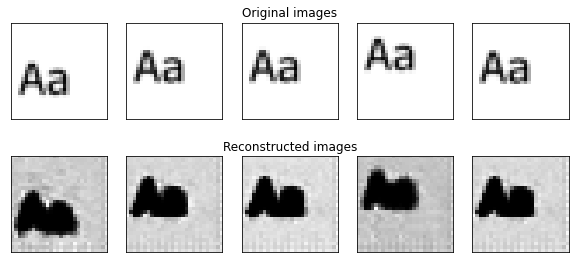

	 partial train loss (single batch): 25971.662109
	 partial train loss (single batch): 23173.150391
	 partial train loss (single batch): 24321.722656
	 partial train loss (single batch): 24099.330078
	 partial train loss (single batch): 31979.214844
	 partial train loss (single batch): 25658.363281
	 partial train loss (single batch): 25268.996094
	 partial train loss (single batch): 25811.984375
	 partial train loss (single batch): 25464.333984
	 partial train loss (single batch): 29652.312500
	 partial train loss (single batch): 19050.744141
	 partial train loss (single batch): 26263.087891
	 partial train loss (single batch): 25839.599609
	 partial train loss (single batch): 27551.138672
	 partial train loss (single batch): 24665.292969
	 partial train loss (single batch): 22192.156250
	 partial train loss (single batch): 22678.964844
	 partial train loss (single batch): 24337.316406
	 partial train loss (single batch): 22970.656250
	 partial train loss (single batch): 24174.636719


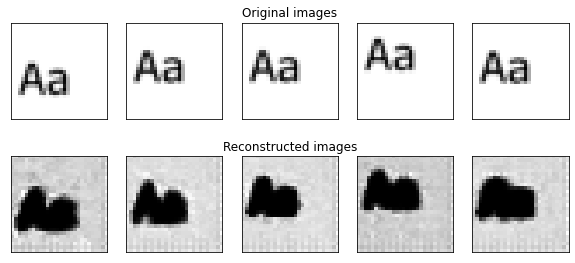

	 partial train loss (single batch): 25947.531250
	 partial train loss (single batch): 23159.253906
	 partial train loss (single batch): 24312.251953
	 partial train loss (single batch): 24114.007812
	 partial train loss (single batch): 31996.099609
	 partial train loss (single batch): 25648.810547
	 partial train loss (single batch): 25276.691406
	 partial train loss (single batch): 25827.662109
	 partial train loss (single batch): 25480.355469
	 partial train loss (single batch): 29659.480469
	 partial train loss (single batch): 19059.189453
	 partial train loss (single batch): 26266.765625
	 partial train loss (single batch): 25813.437500
	 partial train loss (single batch): 27559.794922
	 partial train loss (single batch): 24666.853516
	 partial train loss (single batch): 22207.593750
	 partial train loss (single batch): 22689.306641
	 partial train loss (single batch): 24333.734375
	 partial train loss (single batch): 22963.818359
	 partial train loss (single batch): 24195.269531


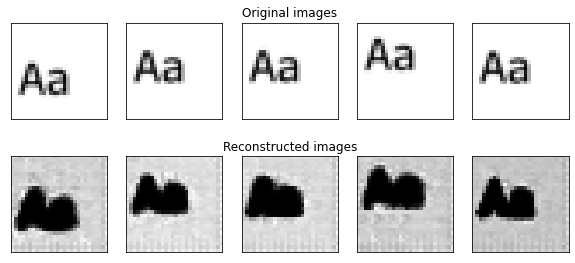

	 partial train loss (single batch): 25970.890625
	 partial train loss (single batch): 23172.484375
	 partial train loss (single batch): 24300.203125
	 partial train loss (single batch): 24114.921875
	 partial train loss (single batch): 31989.556641
	 partial train loss (single batch): 25641.285156
	 partial train loss (single batch): 25265.388672
	 partial train loss (single batch): 25828.496094
	 partial train loss (single batch): 25470.130859
	 partial train loss (single batch): 29623.384766
	 partial train loss (single batch): 19031.404297
	 partial train loss (single batch): 26282.730469
	 partial train loss (single batch): 25823.853516
	 partial train loss (single batch): 27547.943359
	 partial train loss (single batch): 24643.669922
	 partial train loss (single batch): 22217.363281
	 partial train loss (single batch): 22673.367188
	 partial train loss (single batch): 24332.968750
	 partial train loss (single batch): 22971.947266
	 partial train loss (single batch): 24196.623047


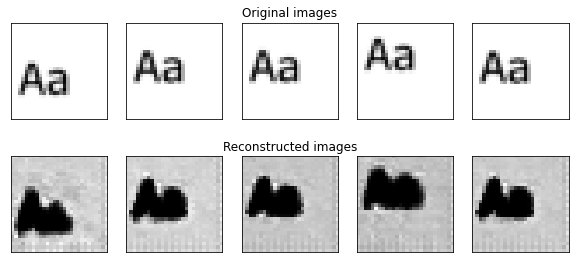

	 partial train loss (single batch): 25960.501953
	 partial train loss (single batch): 23168.085938
	 partial train loss (single batch): 24322.714844
	 partial train loss (single batch): 24129.281250
	 partial train loss (single batch): 31987.328125
	 partial train loss (single batch): 25622.890625
	 partial train loss (single batch): 25281.662109
	 partial train loss (single batch): 25825.677734
	 partial train loss (single batch): 25465.992188
	 partial train loss (single batch): 29644.847656
	 partial train loss (single batch): 19058.005859
	 partial train loss (single batch): 26284.351562
	 partial train loss (single batch): 25816.875000
	 partial train loss (single batch): 27555.351562
	 partial train loss (single batch): 24675.205078
	 partial train loss (single batch): 22196.804688
	 partial train loss (single batch): 22708.146484
	 partial train loss (single batch): 24339.683594
	 partial train loss (single batch): 22980.611328
	 partial train loss (single batch): 24193.511719


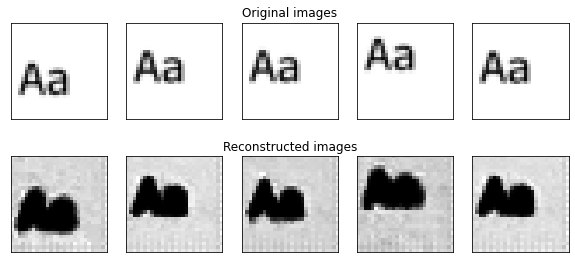

	 partial train loss (single batch): 25954.386719
	 partial train loss (single batch): 23189.998047
	 partial train loss (single batch): 24312.966797
	 partial train loss (single batch): 24128.300781
	 partial train loss (single batch): 31992.367188
	 partial train loss (single batch): 25629.513672
	 partial train loss (single batch): 25281.191406
	 partial train loss (single batch): 25842.250000
	 partial train loss (single batch): 25482.533203
	 partial train loss (single batch): 29642.060547
	 partial train loss (single batch): 19063.595703
	 partial train loss (single batch): 26264.875000
	 partial train loss (single batch): 25825.312500
	 partial train loss (single batch): 27548.242188
	 partial train loss (single batch): 24686.433594
	 partial train loss (single batch): 22216.843750
	 partial train loss (single batch): 22678.269531
	 partial train loss (single batch): 24329.000000
	 partial train loss (single batch): 22974.199219
	 partial train loss (single batch): 24194.625000


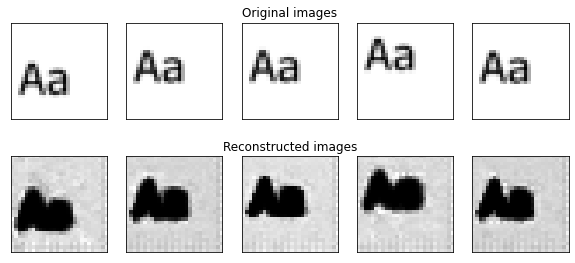

	 partial train loss (single batch): 25946.828125
	 partial train loss (single batch): 23175.140625
	 partial train loss (single batch): 24306.513672
	 partial train loss (single batch): 24124.078125
	 partial train loss (single batch): 31981.517578
	 partial train loss (single batch): 25635.539062
	 partial train loss (single batch): 25299.378906
	 partial train loss (single batch): 25821.898438
	 partial train loss (single batch): 25461.613281
	 partial train loss (single batch): 29631.876953
	 partial train loss (single batch): 19054.591797
	 partial train loss (single batch): 26266.851562
	 partial train loss (single batch): 25822.357422
	 partial train loss (single batch): 27545.349609
	 partial train loss (single batch): 24672.833984
	 partial train loss (single batch): 22211.003906
	 partial train loss (single batch): 22667.578125
	 partial train loss (single batch): 24361.730469
	 partial train loss (single batch): 22955.808594
	 partial train loss (single batch): 24203.054688


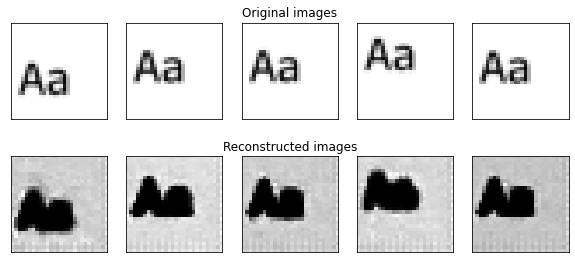

	 partial train loss (single batch): 25946.646484
	 partial train loss (single batch): 23167.212891
	 partial train loss (single batch): 24314.751953
	 partial train loss (single batch): 24115.142578
	 partial train loss (single batch): 31979.724609
	 partial train loss (single batch): 25629.701172
	 partial train loss (single batch): 25264.523438
	 partial train loss (single batch): 25820.789062
	 partial train loss (single batch): 25458.193359
	 partial train loss (single batch): 29637.960938
	 partial train loss (single batch): 19048.212891
	 partial train loss (single batch): 26278.056641
	 partial train loss (single batch): 25813.589844
	 partial train loss (single batch): 27539.923828
	 partial train loss (single batch): 24652.554688
	 partial train loss (single batch): 22219.246094
	 partial train loss (single batch): 22679.662109
	 partial train loss (single batch): 24353.984375
	 partial train loss (single batch): 23002.660156
	 partial train loss (single batch): 24191.611328


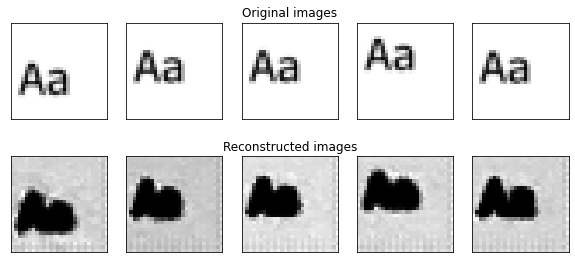

In [27]:
num_epochs = 100
for epoch in range(num_epochs):

   train_loss = train_epoch(vae,device,train_loader,optim)
   val_loss = test_epoch(vae,device,valid_loader)
   print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, num_epochs,train_loss,val_loss))

   plot_ae_outputs(vae.encoder,vae.decoder,n=5)

## 4.Generate samples

In [ ]:
def plot_reconstructed(decoder, r0=(-5, 10), r1=(-10, 5), n=10):
    plt.figure(figsize=(20,8.5))
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to(device)
            x_hat = decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1], cmap='gist_gray')

In [ ]:
#plot_reconstructed(vae.decoder, r0=(-2, 2), r1=(-2, 2))
plot_reconstructed(vae.decoder, r0=(-5, 10), r1=(-10, 5), n=10)

RuntimeError: ignored

<Figure size 1440x612 with 0 Axes>

## 5.Visualize latent space

In [28]:
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    vae.eval()
    with torch.no_grad():
        encoded_img  = vae.encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)

100%|██████████| 920/920 [00:04<00:00, 194.84it/s]


In [29]:
encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples

,Enc. Variable 0,Enc. Variable 1,Enc. Variable 2,Enc. Variable 3,label
0,1.002162,0.677999,1.700401,-0.183040,0
1,-0.066055,0.744144,0.004660,-0.372917,0
2,-0.533823,0.495649,-0.126869,-0.087932,0
3,-1.261304,-0.427360,-0.331019,-0.207471,0
4,-0.286073,0.568845,-0.304066,-1.138082,0
...,...,...,...,...,...
915,1.160695,0.605244,0.247462,-0.362040,6
916,0.774588,0.090315,0.737168,-0.092335,6
917,0.201100,0.254550,2.189595,0.444657,6
918,1.456077,-0.000096,0.689361,0.727487,6


In [30]:
from sklearn.manifold import TSNE
import plotly.express as px

In [31]:
px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=encoded_samples.label.astype(str), opacity=0.7)

In [32]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(encoded_samples.drop(['label'],axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [33]:
fig = px.scatter(tsne_results, x=0, y=1, color=encoded_samples.label.astype(str),labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()

In [34]:
tsne_3D = TSNE(n_components=3)
tsne_3D_results = tsne_3D.fit_transform(encoded_samples.drop(['label'],axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [37]:
fig = px.scatter_3d(tsne_3D_results, x=0, y=1, z=2, color=encoded_samples.label.astype(str),labels={'0': 'tsne-1', '1': 'tsne-2', '2': 'tsne-3'})
fig.show()